#Customer Purchasing Behaviour Analysis

## Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('drive')

['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash']

In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/Colab Notebooks/insight-test.csv')

In [ ]:
print("The raw_dataset has the following shape: {}.".format(df.shape))
df.head(5)

The raw_dataset has the following shape: (229847, 32).


,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,marketing_tier,user_type,user_group,account_type,referrer_type,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov
0,281605921,1,2015-06-12 03:41:44.263000+00:00,NaN,NaN,0.000029,0.0000,0.0,0.00,0.000000,0,0,0,0,0,0,0,tier_2,0,0,0,0,2014-03-23 04:01:30+00:00,0,0.004158,0.001420,0.000000,0.000000,0.00000,0.000000,0.033242,0.155619
1,281605921,1,2015-06-15 04:11:26.177000+00:00,NaN,NaN,0.000024,0.0000,0.0,0.00,0.000000,0,1,1,0,0,1,0,tier_2,0,0,0,0,2014-03-23 04:01:30+00:00,0,0.004158,0.001420,0.000000,0.000000,0.00000,0.000000,0.033242,0.155619
2,125302602,0,2015-04-24 14:07:48.720000+00:00,NaN,NaN,0.000164,0.0000,0.0,0.00,0.000000,0,1,1,1,6,1,1,tier_2,1,1,0,1,2013-07-18 07:24:40+00:00,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703
3,125302602,0,2015-05-04 01:05:09.518000+00:00,1.0,1.0,0.000175,0.0002,1.0,0.01,0.019864,1,1,1,1,6,1,1,tier_2,1,1,0,1,2013-07-18 07:24:40+00:00,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703
4,125302602,0,2015-05-15 11:18:25.739000+00:00,1.0,1.0,0.000170,0.0002,1.0,0.01,0.019324,1,1,1,1,0,1,1,tier_2,1,1,0,1,2013-07-18 07:24:40+00:00,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703



### Data Description

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'f', 'table', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


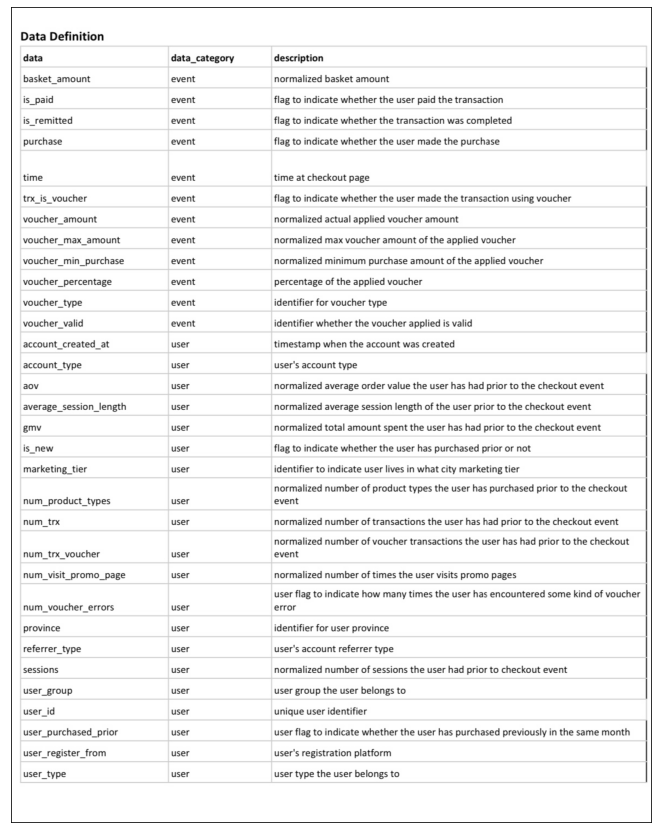

In [ ]:
# importing Image class from PIL package
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
fig, ax = plt.subplots(figsize=(25,15))
img=Image.open('drive/MyDrive/Data_Def.jpg')
imgplot = plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

## Data Wrangling

In [ ]:
df.describe(exclude = [np.number]).T

,count,unique,top,freq
time,229847,229835,2015-06-15 08:00:20.981000+00:00,2
marketing_tier,229071,4,tier_1,153695
account_created_at,229847,69159,2013-01-12 07:07:50+00:00,474


In [ ]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
user_id,229847.0,3.689137e+08,2.143305e+08,110.0,1.362190e+08,4.270587e+08,5.829234e+08,628395770.0
is_new,229847.0,1.299038e-01,3.361983e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
voucher_type,38958.0,8.206017e-01,3.836904e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0
voucher_valid,41981.0,9.279912e-01,2.585055e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0
basket_amount,229847.0,8.847145e-05,2.981527e-03,0.0,1.372406e-05,2.697870e-05,5.097647e-05,1.0
voucher_max_amount,229847.0,3.560765e-04,1.829994e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
voucher_percentage,229847.0,1.826686e+00,1.105585e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,99.0
voucher_min_purchase,229847.0,1.640373e-03,1.976342e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
voucher_amount,229847.0,4.845439e-03,2.557759e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
trx_is_voucher,229847.0,1.577441e-01,3.645016e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229847 entries, 0 to 229846
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 229847 non-null  int64  
 1   is_new                  229847 non-null  int64  
 2   time                    229847 non-null  object 
 3   voucher_type            38958 non-null   float64
 4   voucher_valid           41981 non-null   float64
 5   basket_amount           229847 non-null  float64
 6   voucher_max_amount      229847 non-null  float64
 7   voucher_percentage      229847 non-null  float64
 8   voucher_min_purchase    229847 non-null  float64
 9   voucher_amount          229847 non-null  float64
 10  trx_is_voucher          229847 non-null  int64  
 11  is_paid                 229847 non-null  int64  
 12  is_remitted             229847 non-null  int64  
 13  user_purchased_prior    229847 non-null  int64  
 14  num_voucher_errors  

In [ ]:
df.isnull().sum()

user_id                        0
is_new                         0
time                           0
voucher_type              190889
voucher_valid             187866
basket_amount                  0
voucher_max_amount             0
voucher_percentage             0
voucher_min_purchase           0
voucher_amount                 0
trx_is_voucher                 0
is_paid                        0
is_remitted                    0
user_purchased_prior           0
num_voucher_errors             0
purchase                       0
province                       0
marketing_tier               776
user_type                      0
user_group                     0
account_type                   0
referrer_type                  0
account_created_at             0
user_register_from             0
sessions                       0
average_session_length         0
num_visit_promo_page           0
num_product_types              0
num_trx                        0
num_trx_voucher                0
gmv       

### Handling Missing Value

In [ ]:
df['voucher_type']=df['voucher_type'].fillna('none')
df['voucher_type'].unique()

array(['none', 1.0, 0.0], dtype=object)

In [ ]:
df['voucher_valid']=df['voucher_valid'].fillna('none')
df['voucher_valid'].unique()

array(['none', 1.0, 0.0], dtype=object)

In [ ]:
df['marketing_tier']=df['marketing_tier'].fillna('none')
df['marketing_tier'].unique()

array(['tier_2', 'tier_1', 'tier_3', 'tier_4', 'none'], dtype=object)

In [ ]:
#Encoding marketing_tier
marketing_tier_ = []
for i in df['marketing_tier']:
  if i == 'none':
    marketing_tier_.append(0)
  elif i == 'tier_1':
    marketing_tier_.append(1)
  elif i == 'tier_2':
    marketing_tier_.append(2)
  elif i == 'tier_3':
    marketing_tier_.append(3)
  else:
    marketing_tier_.append(4)

In [ ]:
df['marketing_tier_code'] = marketing_tier_

In [ ]:
df.marketing_tier_code.unique()

array([2, 1, 3, 4, 0])

Checking duplicate rows in all columns

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,marketing_tier,user_type,user_group,account_type,referrer_type,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov,marketing_tier_code


In [ ]:
df.shape

(229847, 33)

Checking negatif values on basket amount

In [ ]:
df[df['basket_amount'] < 0]

,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,marketing_tier,user_type,user_group,account_type,referrer_type,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov,marketing_tier_code


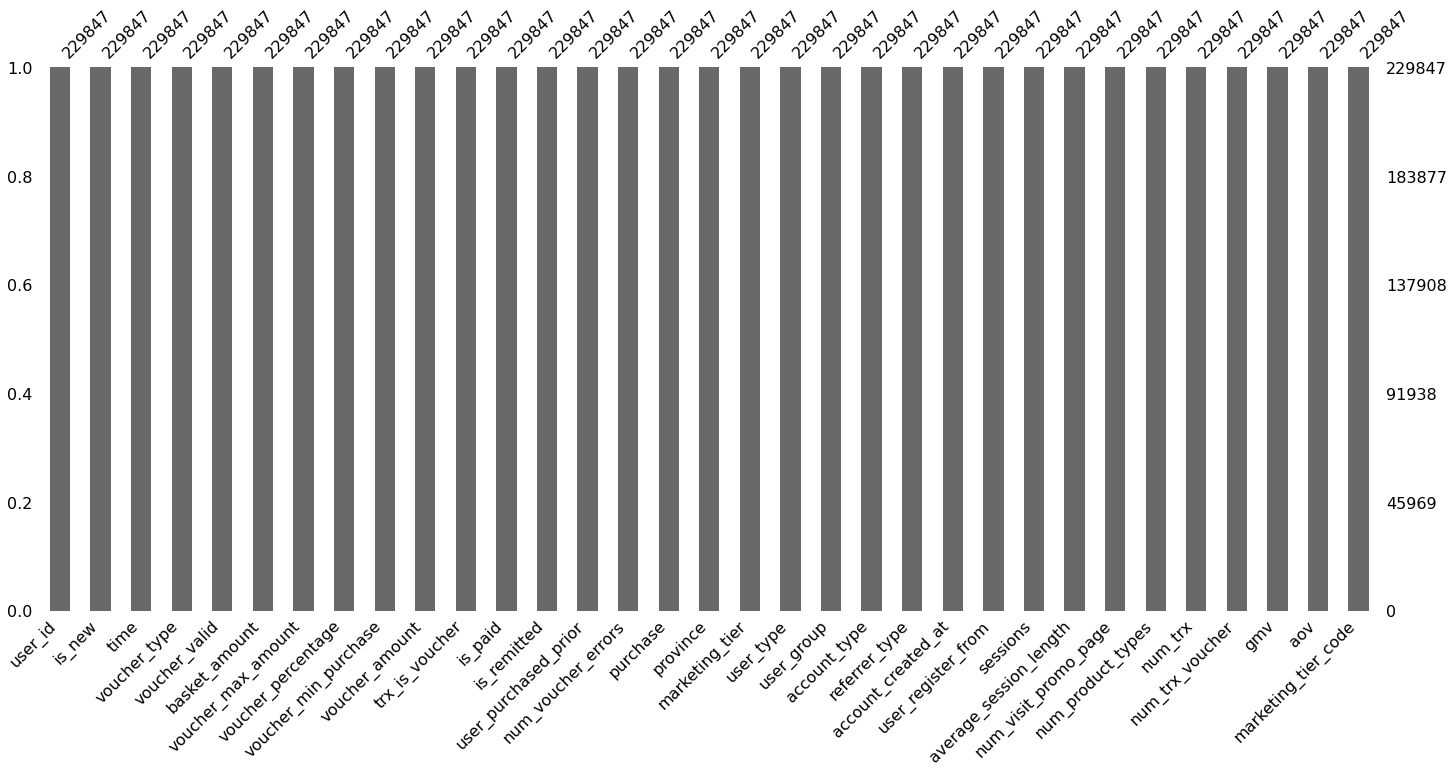

In [ ]:
import pandas_profiling
import missingno as msno
%matplotlib inline
msno.bar(df)

now there's no missing value

## Exploratory Data Analysis (EDA)

### Calculate CVR
Conversion Rate = Total number of transactions  / Total number of sessions * 100

In [ ]:
#calculate conversion rate (CVR)
df['cvr']=df['num_trx']/df['sessions']*100
df['cvr'] = df['cvr'].fillna(0)
df['cvr']

0         0.000000
1         0.000000
2         0.547126
3         0.547126
4         0.547126
            ...   
229842    1.346897
229843    0.974123
229844    0.541179
229845    0.000000
229846    0.186614
Name: cvr, Length: 229847, dtype: float64

In [ ]:
cvr_conv = []
for i in df['cvr']:
  if i == float('inf'):
    cvr_conv.append(0)
  else:
    value = i
    cvr_conv.append(value)

In [ ]:
df['cvr_convert'] = cvr_conv
df['cvr_convert']

0         0.000000
1         0.000000
2         0.547126
3         0.547126
4         0.547126
            ...   
229842    1.346897
229843    0.974123
229844    0.541179
229845    0.000000
229846    0.186614
Name: cvr_convert, Length: 229847, dtype: float64

In [ ]:
cvr = df['num_trx'].sum()/df['sessions'].sum()*100
print("Average Conversion Rate All sessions is {}%".format(round(cvr, 2),'%'))

Average Conversion Rate All sessions is 0.9%


The average conversion rate is around 0.9% which is not the industry standard. (1-2%) If there are 1000 users on the app/website, around 9 of them will purchase the product.

In [ ]:
df['Month'] = pd.to_datetime(df['time'], errors='coerce', utc=True).dt.strftime('%m')

In [ ]:
marketing = pd.DataFrame(df.groupby('marketing_tier')['cvr_convert'].mean()).reset_index(inplace=False)
marketing

,marketing_tier,cvr_convert
0,none,0.286761
1,tier_1,0.770624
2,tier_2,0.721005
3,tier_3,0.664025
4,tier_4,0.258844


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

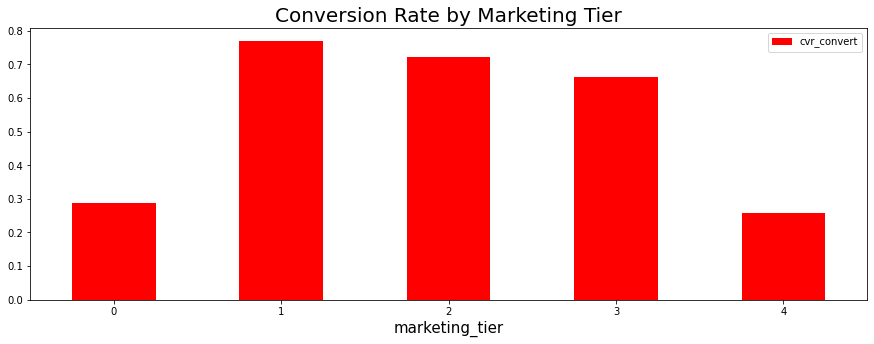

In [ ]:
marketing.plot(kind = 'bar',figsize=(15,5), color='red')
plt.title('Conversion Rate by Marketing Tier',fontsize=20)
plt.xlabel('marketing_tier',fontsize=15)
plt.xticks(rotation=0)

In [ ]:
cvr_prov = pd.DataFrame(df.groupby('province')['cvr_convert'].mean()).reset_index(inplace=False)
cvr_prov

,province,cvr_convert
0,0,0.690176
1,1,0.802777
2,2,0.796808
3,3,0.762628
4,4,0.669245
5,5,0.788892
6,6,0.323379
7,7,0.653279
8,8,0.734705
9,9,0.778585


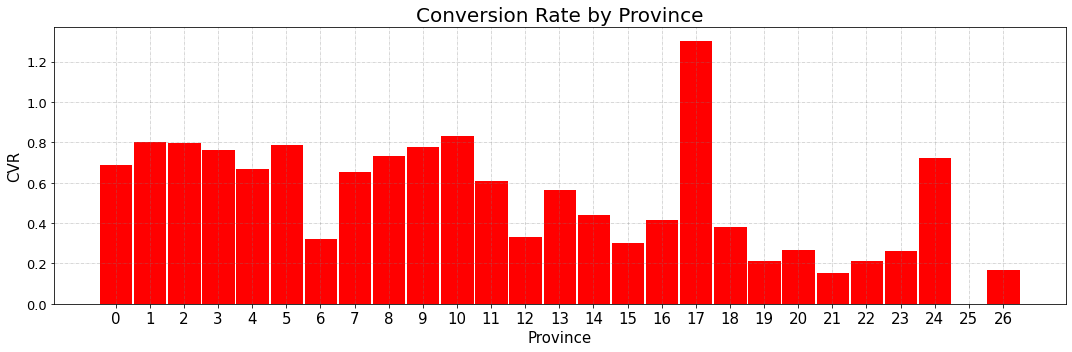

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = cvr_prov.province
attrate = cvr_prov.cvr_convert

m = np.arange(len(labels))  # the label locations
width = 0.95  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(m + width/80, attrate, width, color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('CVR', fontsize=15)
plt.xlabel('Province', fontsize=15)
ax.set_title('Conversion Rate by Province', fontsize=20)
plt.xticks(m, fontsize=13)
plt.yticks(fontsize=13)
ax.set_xticklabels(labels, fontsize=15)

# Add x, y gridlines
ax.grid(b=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)





fig.tight_layout()

plt.show()

In [ ]:
table = pd.pivot_table(df, values='cvr_convert', index=['Month'],
                    columns=['marketing_tier'], aggfunc='mean', fill_value=0)
table

marketing_tier,none,tier_1,tier_2,tier_3,tier_4
Month,,,,,
03,0.268716,0.646491,0.726216,0.567520,0.168628
04,0.150040,0.752772,0.750933,0.525876,0.072212
05,0.313372,0.821694,0.734210,0.820870,0.293759
06,0.359830,0.732673,0.674472,0.594340,0.703752


In [ ]:
table = table.reset_index(inplace=False)
table

marketing_tier,Month,none,tier_1,tier_2,tier_3,tier_4
0,03,0.268716,0.646491,0.726216,0.567520,0.168628
1,04,0.150040,0.752772,0.750933,0.525876,0.072212
2,05,0.313372,0.821694,0.734210,0.820870,0.293759
3,06,0.359830,0.732673,0.674472,0.594340,0.703752


In [ ]:
table['cvr_per_month'] = (table['none'] + table['tier_1'] + table['tier_2'] + table['tier_3'] + table['tier_4'])
table

marketing_tier,Month,none,tier_1,tier_2,tier_3,tier_4,cvr_per_month
0,03,0.268716,0.646491,0.726216,0.567520,0.168628,2.377570
1,04,0.150040,0.752772,0.750933,0.525876,0.072212,2.251834
2,05,0.313372,0.821694,0.734210,0.820870,0.293759,2.983905
3,06,0.359830,0.732673,0.674472,0.594340,0.703752,3.065066


(array([2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2]),
 <a list of 11 Text major ticklabel objects>)

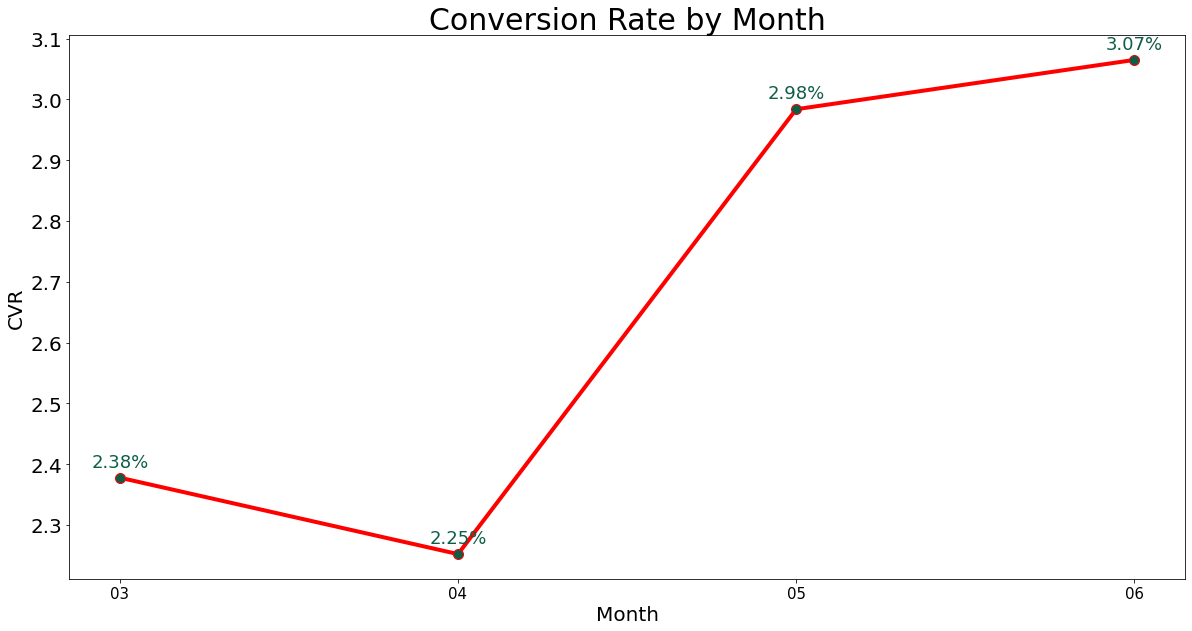

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))
plt.plot('Month', 'cvr_per_month', data=table, marker='o', markerfacecolor='#0D5D47', markersize=10, color='red', linewidth=4)


xs=table['Month']
ys=table['cvr_per_month']
for x,y in zip(xs,ys):

    label = "{:.2f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 rotation=0,
                 textcoords="offset points", color='#0D5D47',# how to position the text
                 xytext=(0,11), fontsize=18,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



#Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('CVR', fontsize=20)
plt.xlabel('Month',fontsize=20)
ax.set_title('Conversion Rate by Month', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


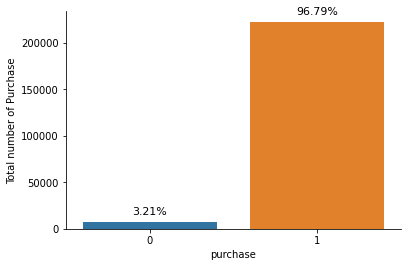

In [ ]:
import seaborn as sns
# function to add percentage to plot
def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

ax = sns.countplot('purchase',data = df)
plt.ylabel('Total number of Purchase')
annot_plot(ax, 0.08,1)
plt.show()

In [ ]:
#calculate Length of Membership
from datetime import datetime
df['account_created_at']=pd.to_datetime(df['account_created_at']).dt.date
df['time']=pd.to_datetime(df['time']).dt.date
df['length_of_membership']=df['time'].max() - df['account_created_at']
df['length_of_membership']=df['length_of_membership'].dt.days / 365
df['length_of_membership']

0         1.241096
1         1.241096
2         1.920548
3         1.920548
4         1.920548
            ...   
229842    1.931507
229843    1.928767
229844    1.928767
229845    1.926027
229846    1.923288
Name: length_of_membership, Length: 229847, dtype: float64

In [ ]:
df.head()

,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,marketing_tier,user_type,user_group,account_type,referrer_type,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov,marketing_tier_code,cvr,cvr_convert,Month,length_of_membership
0,281605921,1,2015-06-12,none,none,0.000029,0.0000,0.0,0.00,0.000000,0,0,0,0,0,0,0,tier_2,0,0,0,0,2014-03-23,0,0.004158,0.001420,0.000000,0.000000,0.00000,0.000000,0.033242,0.155619,2,0.000000,0.000000,06,1.241096
1,281605921,1,2015-06-15,none,none,0.000024,0.0000,0.0,0.00,0.000000,0,1,1,0,0,1,0,tier_2,0,0,0,0,2014-03-23,0,0.004158,0.001420,0.000000,0.000000,0.00000,0.000000,0.033242,0.155619,2,0.000000,0.000000,06,1.241096
2,125302602,0,2015-04-24,none,none,0.000164,0.0000,0.0,0.00,0.000000,0,1,1,1,6,1,1,tier_2,1,1,0,1,2013-07-18,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703,2,0.547126,0.547126,04,1.920548
3,125302602,0,2015-05-04,1,1,0.000175,0.0002,1.0,0.01,0.019864,1,1,1,1,6,1,1,tier_2,1,1,0,1,2013-07-18,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703,2,0.547126,0.547126,05,1.920548
4,125302602,0,2015-05-15,1,1,0.000170,0.0002,1.0,0.01,0.019324,1,1,1,1,0,1,1,tier_2,1,1,0,1,2013-07-18,1,0.016450,0.004848,0.006757,0.225806,0.00009,0.016166,0.033882,0.157703,2,0.547126,0.547126,05,1.920548


In [ ]:
df['length_of_membership'].unique()

array([1.24109589, 1.92054795, 1.91780822, ..., 8.33972603, 4.40821918,
       3.15342466])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229847 entries, 0 to 229846
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 229847 non-null  int64  
 1   is_new                  229847 non-null  int64  
 2   time                    229847 non-null  object 
 3   voucher_type            229847 non-null  object 
 4   voucher_valid           229847 non-null  object 
 5   basket_amount           229847 non-null  float64
 6   voucher_max_amount      229847 non-null  float64
 7   voucher_percentage      229847 non-null  float64
 8   voucher_min_purchase    229847 non-null  float64
 9   voucher_amount          229847 non-null  float64
 10  trx_is_voucher          229847 non-null  int64  
 11  is_paid                 229847 non-null  int64  
 12  is_remitted             229847 non-null  int64  
 13  user_purchased_prior    229847 non-null  int64  
 14  num_voucher_errors  

In [ ]:
df['gmv'].sum()

7768.686497466792

In [ ]:
df['num_trx'].sum()

68.31063223675716

### Assumption
Transaction has completed if the users purchased goods and then they paid their orders. In this case, purchase = 1 and is_paid = 1.

Meanwhile, is_remitted in here meaning that flag to indicate whether the transaction was completed until the order goods has been delivered and received by the user.

In [ ]:
#we will filter only users that has purchased and paid the transaction
df1 = df[(df['purchase']== 1) & (df['is_paid']==1)]

In [ ]:

user_prov = pd.DataFrame(df1.groupby('province')['user_id'].count()).reset_index(inplace=False).sort_values(by='user_id', ascending = False)
user_prov

,province,user_id
1,1,91816
3,3,26192
2,2,22921
4,4,20459
0,0,18715
7,7,8813
13,13,8618
5,5,5673
8,8,5302
10,10,3628


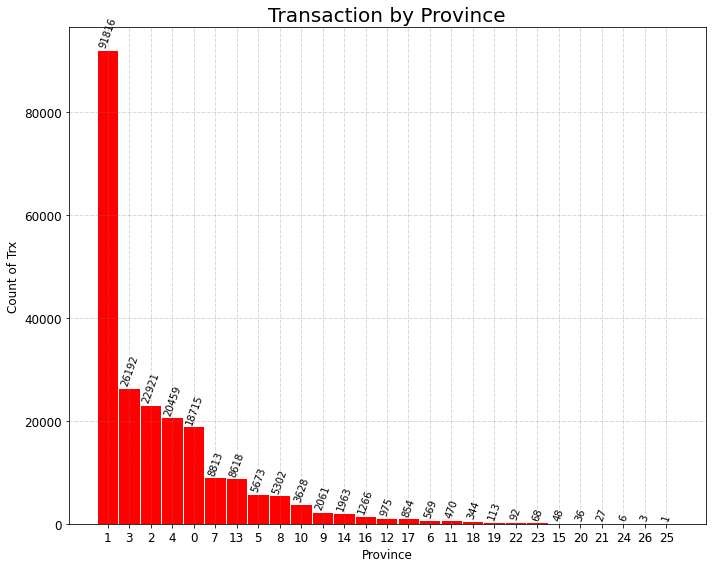

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = user_prov.province
attrate = user_prov.user_id

m = np.arange(len(labels))  # the label locations
width = 0.95  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(m + width/80, attrate, width, color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count of Trx', fontsize=12)
plt.xlabel('Province', fontsize=12)
ax.set_title('Transaction by Province', fontsize=20)
plt.xticks(m, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xticklabels(labels, fontsize=12)

# Add x, y gridlines
ax.grid(b=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), rotation=70,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",fontsize=10,
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


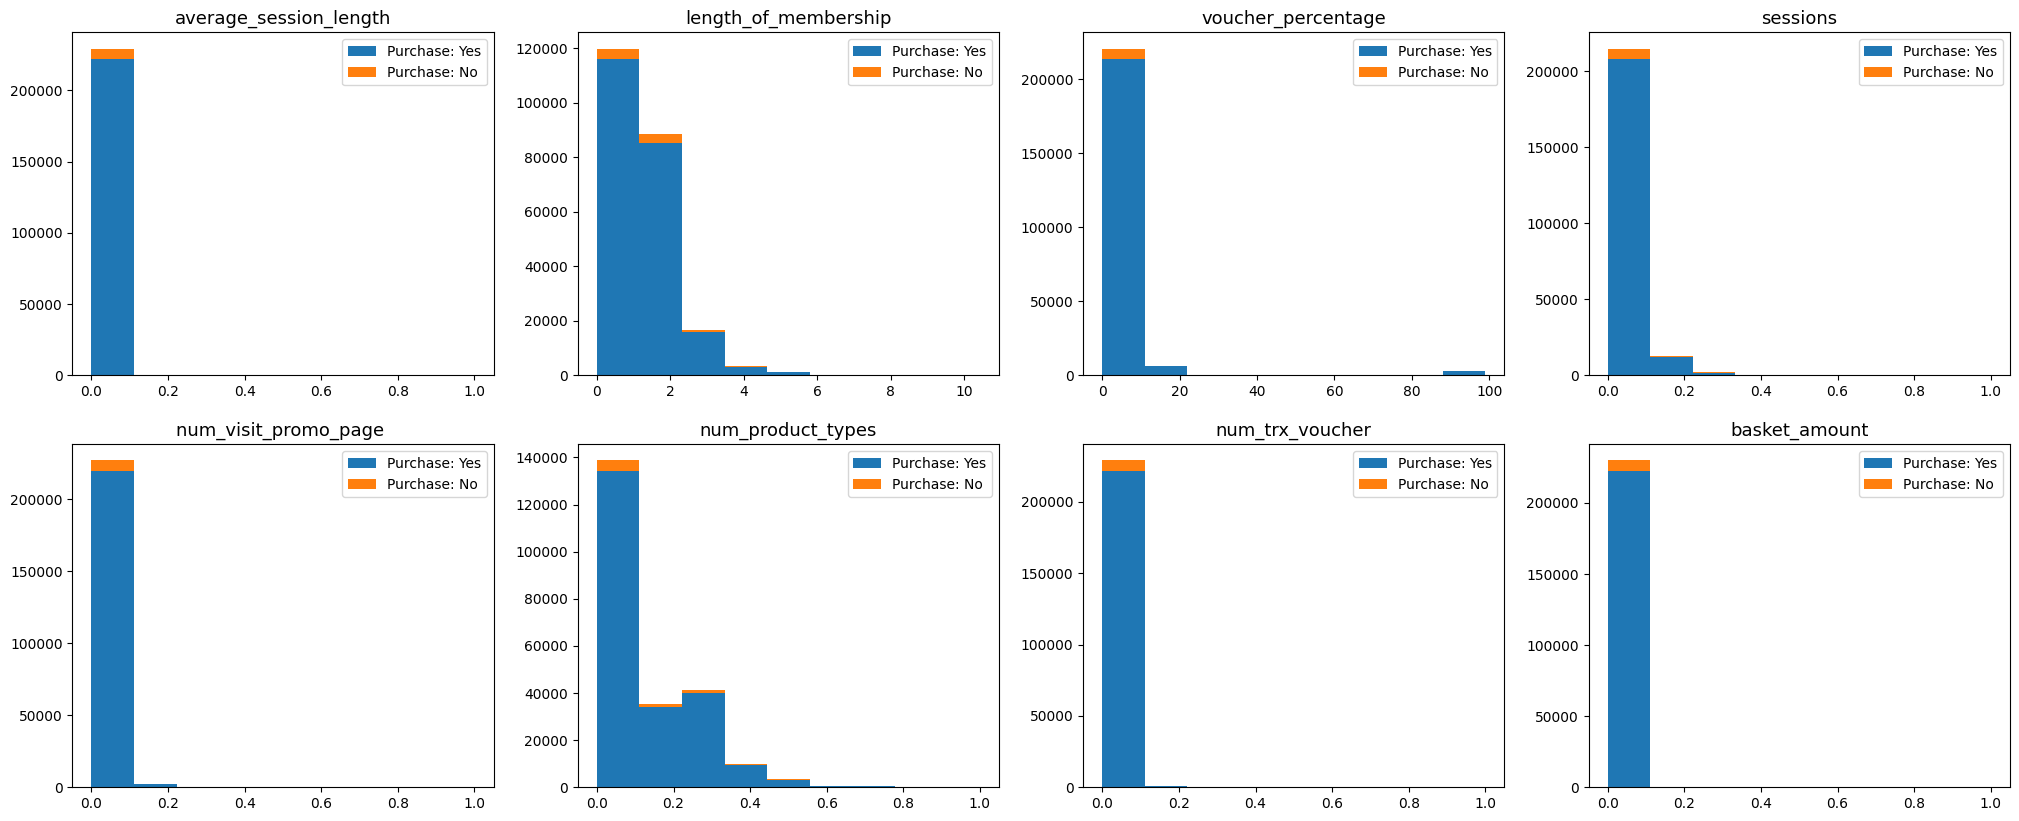

In [ ]:
data_purchase_Y = df.loc[df['purchase'] == 1]
data_purchase_N = df.loc[df['purchase'] == 0]


f, axes = plt.subplots(2, 4, figsize=(25, 10), sharex=False, dpi=100, sharey=False, facecolor='w', edgecolor='k')
font_title = 13
lg = ['Purchase: Yes','Purchase: No']

# Plot 1: average_session_length
label = "average_session_length"
axes[0,0].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[0,0].set_title('average_session_length',fontsize=font_title)
axes[0,0].legend(lg)

# Plot 2: length_of_membership
label = "length_of_membership"
axes[0,1].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[0,1].set_title('length_of_membership',fontsize=font_title)
axes[0,1].legend(lg)

# Plot 3: voucher_percentage
label = "voucher_percentage"
axes[0,2].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[0,2].set_title('voucher_percentage',fontsize=font_title)
axes[0,2].legend(lg)

# Plot 4: sessions
label = "sessions"
axes[0,3].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[0,3].set_title('sessions',fontsize=font_title)
axes[0,3].legend(lg)

# Plot 5: num_visit_promo_page
label = "num_visit_promo_page"
axes[1,0].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[1,0].set_title('num_visit_promo_page ',fontsize=font_title)
axes[1,0].legend(lg)

# Plot 6: num_product_types
label = "num_product_types"
axes[1,1].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[1,1].set_title('num_product_types',fontsize=font_title)
axes[1,1].legend(lg)

# Plot 7:num_trx_voucher
label = "num_trx_voucher"
axes[1,2].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[1,2].set_title('num_trx_voucher',fontsize=font_title)
axes[1,2].legend(lg)

# Plot 8: basket_amount
label = "basket_amount"
axes[1,3].hist([data_purchase_Y[label],data_purchase_N[label]], bins = 9, stacked=True)
axes[1,3].set_title('basket_amount',fontsize=font_title)
axes[1,3].legend(lg)



In [ ]:
def pointplot(x, y, **kwargs): # making a function to plot point plot
    sns.pointplot(x=x, y=y)
    x=plt.xticks(rotation=90)

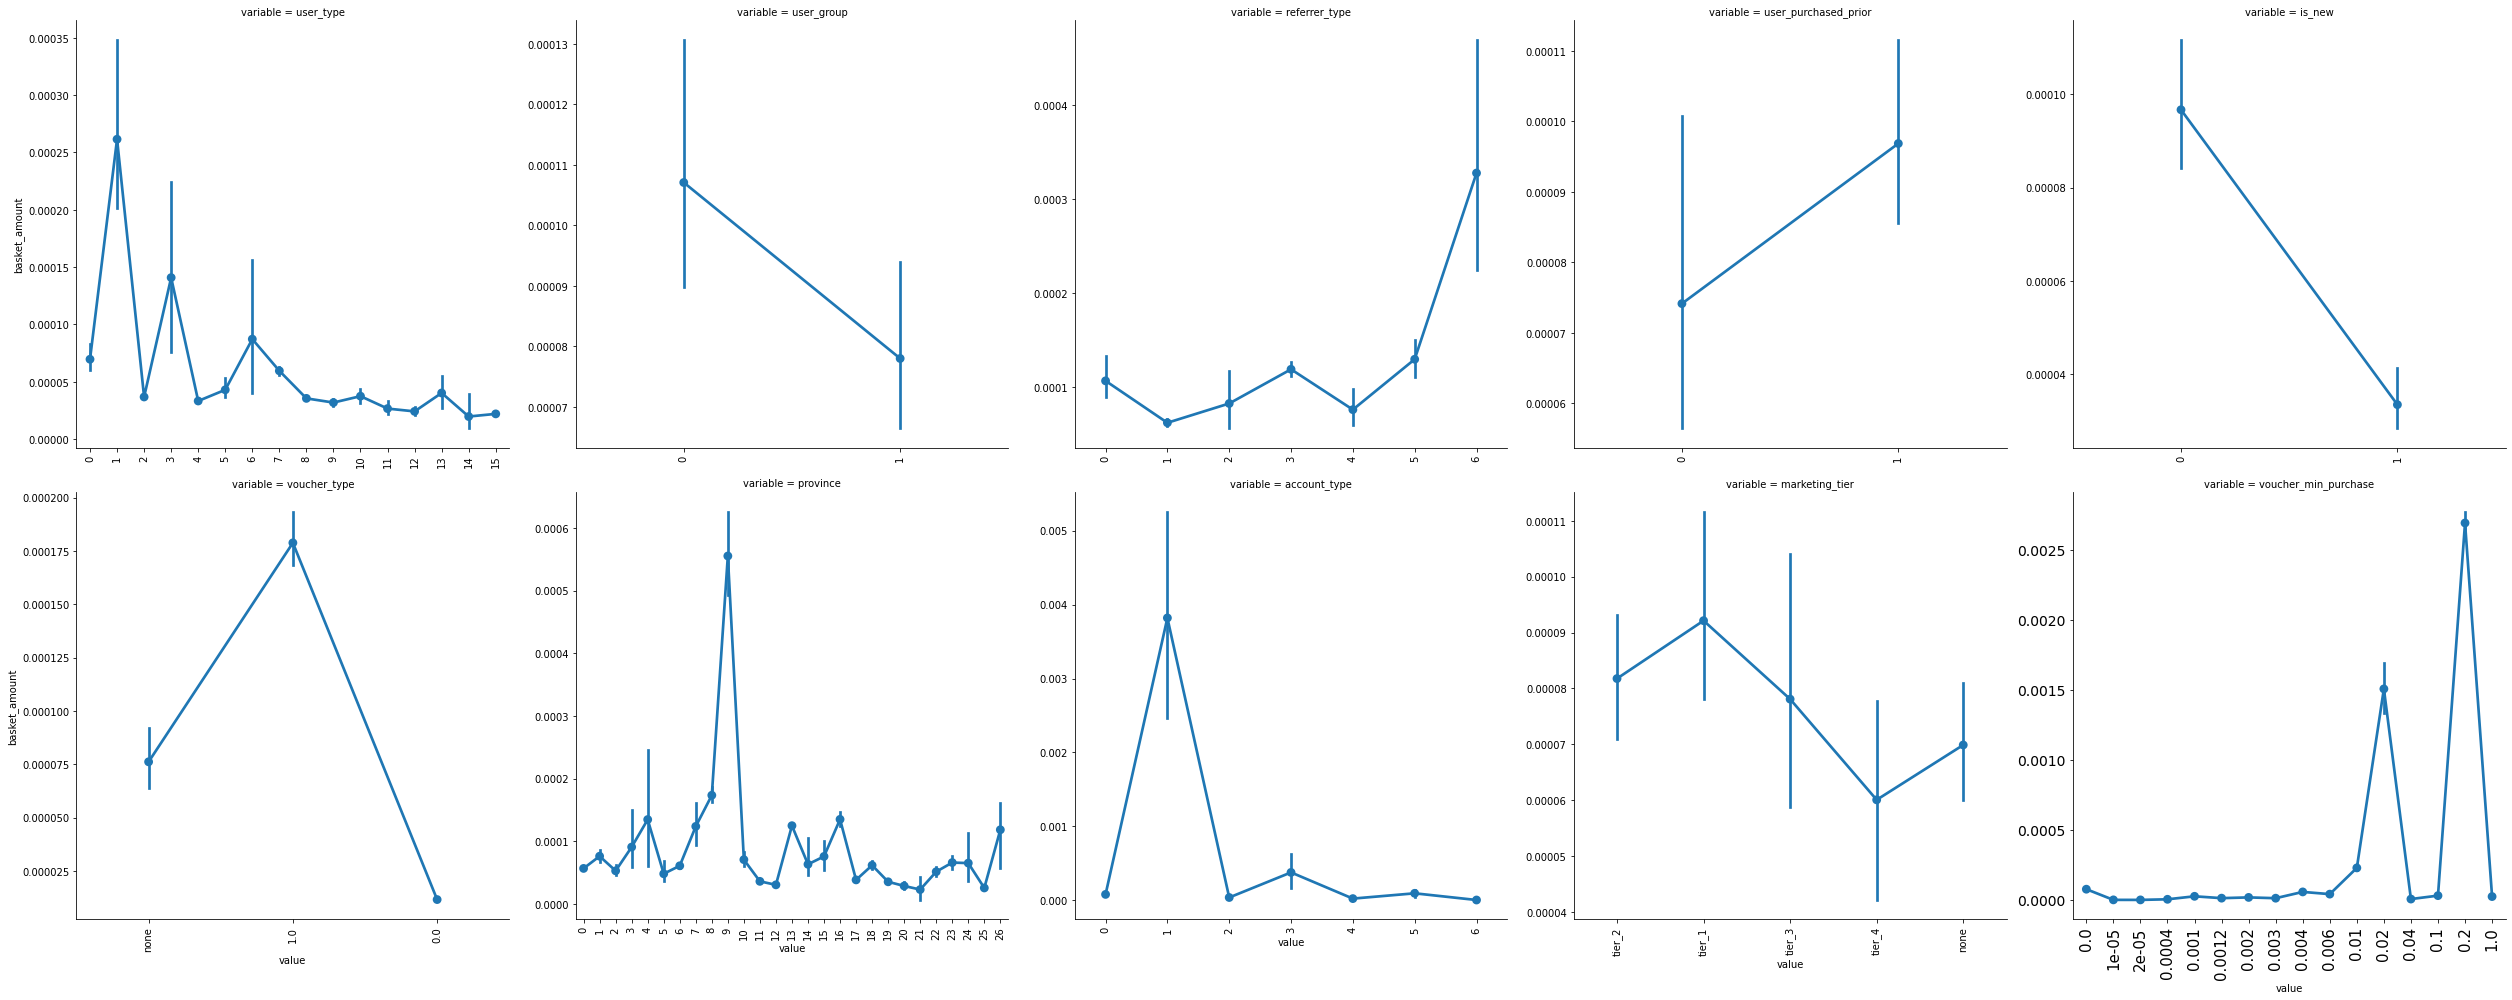

In [ ]:
# Start with categorical var vs Basket Amount
categorical_variable=['user_type', 'user_group', 'referrer_type',
                      'user_purchased_prior', 'is_new', 'voucher_type', 'province',
                      'account_type','marketing_tier','voucher_min_purchase']
f = pd.melt(df, id_vars=['basket_amount'], value_vars=categorical_variable)
g=sns.FacetGrid(f,col='variable',col_wrap=5,sharex=False,sharey=False,height=7)

plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel(' ',fontsize=15)
plt.title(' ', fontsize=13)
g.map(pointplot,'value','basket_amount')

In [ ]:
df['Month'] = pd.to_datetime(df['time'], errors='coerce', utc=True).dt.strftime('%m')

In [ ]:
df.groupby('Month')['purchase'].value_counts()

Month  purchase
03     1            5314
       0            1547
04     1           62041
       0            2863
05     1           89177
       0            1692
06     1           65935
       0            1278
Name: purchase, dtype: int64

In [ ]:
df.groupby('Month')['is_new'].value_counts()

Month  is_new
03     0          6686
       1           175
04     0         55800
       1          9104
05     0         79209
       1         11660
06     0         58294
       1          8919
Name: is_new, dtype: int64

In [ ]:
df.groupby('Month')['province'].value_counts()

Month  province
03     1           3417
       3           1071
       0            828
       4            568
       2            300
                   ... 
06     23            13
       20            12
       21             9
       22             8
       24             3
Name: province, Length: 96, dtype: int64

In [ ]:
df.groupby('marketing_tier')['user_id'].count()

marketing_tier
none         776
tier_1    153695
tier_2     64509
tier_3     10688
tier_4       179
Name: user_id, dtype: int64

In [ ]:
df1=df[df['purchase']==1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([0]), <a list of 1 Text major ticklabel objects>)

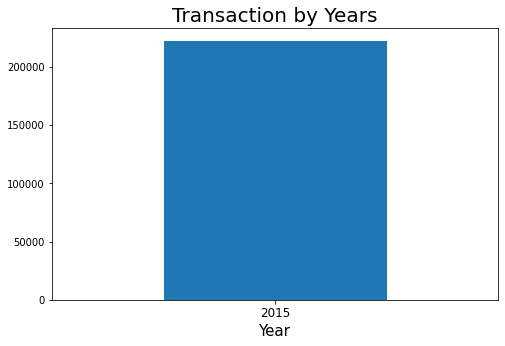

In [ ]:
# To extract "year" from date.
from datetime import datetime
import calendar
df1['Year'] = pd.to_datetime(df1['time'], errors='coerce', utc=True).dt.strftime('%Y')
df1.groupby('Year').size().plot(kind = 'bar',figsize=(8,5))
plt.title('Transaction by Years',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=12, rotation=0)

In [ ]:
df1.groupby(['Year'])['user_id'].count()

Year
2015    222467
Name: user_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

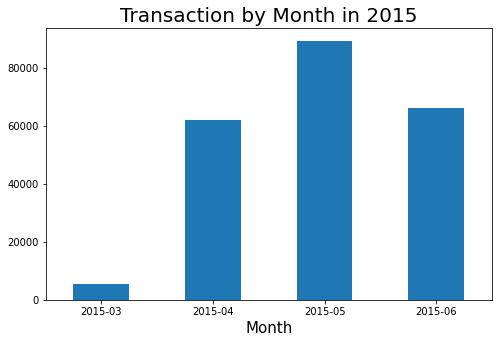

In [ ]:
df1['Month'] = pd.to_datetime(df1['time'], errors='coerce', utc=True).dt.strftime('%Y-%m')
df1['Month']
df1.groupby('Month').size().plot(kind = 'bar',figsize=(8,5))
plt.title('Transaction by Month in 2015',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation=0)

In [ ]:
df1.groupby(['Month'])['user_id'].count()

Month
2015-03     5314
2015-04    62041
2015-05    89177
2015-06    65935
Name: user_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

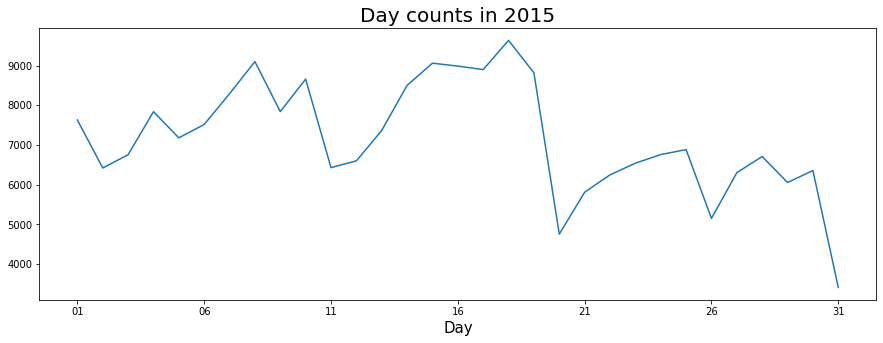

In [ ]:
df1['Day'] = pd.to_datetime(df1['time'], errors='coerce', utc=True).dt.strftime('%d')
df1.groupby('Day').size().plot(kind = 'line',figsize=(15,5))
plt.title('Day counts in 2015',fontsize=20)
plt.xlabel('Day',fontsize=15)
plt.xticks(rotation=0)

### Transaction by Time

In [ ]:
df['Month'] = pd.to_datetime(df['time'], errors='coerce', utc=True).dt.strftime('%m')

table = pd.pivot_table(df, values='gmv', index=['Month'],
                    columns=['province'], aggfunc='sum', fill_value=0)
table

province,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,
03,27.833689,114.815921,10.105883,36.169187,19.092076,7.778447,0.000000,6.928760,2.583722,0.433116,2.614329,0.033450,0.434872,1.204735,0.534012,0.000000,0.033242,0.034684,0.100430,0.000000,0.000000,0.066537,0.033247,0.000000,0.000000,0.000000,0.000000
04,229.368323,877.235205,234.532891,291.547524,180.644754,59.656972,2.562924,100.909378,54.373391,27.387911,39.942609,3.825062,10.554005,35.467147,18.071198,1.929167,8.020469,12.493442,3.461864,0.598401,0.132975,1.064123,0.997765,1.130334,0.033832,0.000000,0.100394
05,257.657641,1253.836249,309.284641,350.362664,286.662417,102.326429,8.895231,133.761174,75.785124,31.808317,50.771187,5.789049,11.560844,126.941156,27.243986,1.432138,20.202625,9.826488,4.792529,1.562603,0.698133,0.332625,1.795491,0.731749,0.067467,0.033242,0.000000
06,151.425515,994.217424,240.612704,245.664423,223.775223,29.757203,7.685122,66.701596,54.231272,25.424793,33.747230,6.322286,10.922731,128.809959,20.821847,0.832167,14.071606,6.334220,3.167047,1.630610,0.399154,0.299445,0.266043,0.432209,0.101073,0.000000,0.000000


In [ ]:
table_prov = table.reset_index(inplace=False)

In [ ]:
table_prov.columns

Index(['Month',       0,       1,       2,       3,       4,       5,       6,
             7,       8,       9,      10,      11,      12,      13,      14,
            15,      16,      17,      18,      19,      20,      21,      22,
            23,      24,      25,      26],
      dtype='object', name='province')

In [ ]:
table_prov.head()

province,Month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,03,27.833689,114.815921,10.105883,36.169187,19.092076,7.778447,0.000000,6.928760,2.583722,0.433116,2.614329,0.033450,0.434872,1.204735,0.534012,0.000000,0.033242,0.034684,0.100430,0.000000,0.000000,0.066537,0.033247,0.000000,0.000000,0.000000,0.000000
1,04,229.368323,877.235205,234.532891,291.547524,180.644754,59.656972,2.562924,100.909378,54.373391,27.387911,39.942609,3.825062,10.554005,35.467147,18.071198,1.929167,8.020469,12.493442,3.461864,0.598401,0.132975,1.064123,0.997765,1.130334,0.033832,0.000000,0.100394
2,05,257.657641,1253.836249,309.284641,350.362664,286.662417,102.326429,8.895231,133.761174,75.785124,31.808317,50.771187,5.789049,11.560844,126.941156,27.243986,1.432138,20.202625,9.826488,4.792529,1.562603,0.698133,0.332625,1.795491,0.731749,0.067467,0.033242,0.000000
3,06,151.425515,994.217424,240.612704,245.664423,223.775223,29.757203,7.685122,66.701596,54.231272,25.424793,33.747230,6.322286,10.922731,128.809959,20.821847,0.832167,14.071606,6.334220,3.167047,1.630610,0.399154,0.299445,0.266043,0.432209,0.101073,0.000000,0.000000


In [ ]:

table_5_prov = table_prov[['Month', 1,3,2,4,0]]
table_5_prov = table_5_prov.rename(columns={'Month':'Month',
                                            0 : 'prov_0',
                                            1 :'prov_1',
                                            2 : 'prov_2',
                                            3 : 'prov_3',
                                            4 : 'prov_4'})
table_5_prov

province,Month,prov_1,prov_3,prov_2,prov_4,prov_0
0,03,114.815921,36.169187,10.105883,19.092076,27.833689
1,04,877.235205,291.547524,234.532891,180.644754,229.368323
2,05,1253.836249,350.362664,309.284641,286.662417,257.657641
3,06,994.217424,245.664423,240.612704,223.775223,151.425515


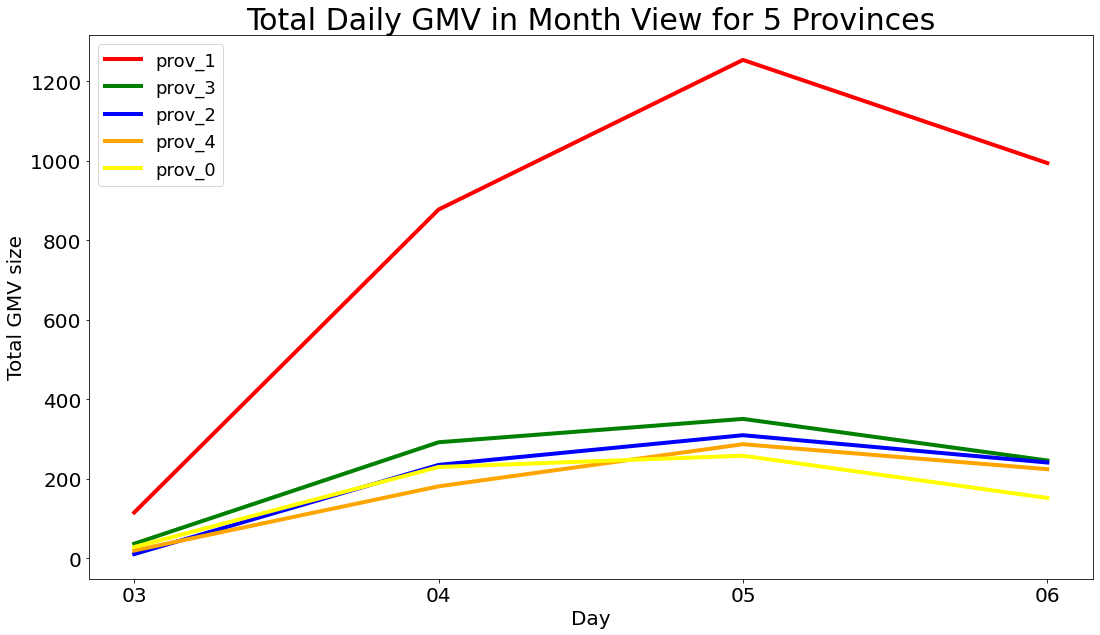

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
plt.plot('Month', 'prov_1', data=table_5_prov, color='red', linewidth=4)
plt.plot('Month', 'prov_3', data=table_5_prov, color='g', linewidth=4)
plt.plot('Month', 'prov_2', data=table_5_prov, color='b', linewidth=4)
plt.plot('Month', 'prov_4', data=table_5_prov, color='orange', linewidth=4)
plt.plot('Month', 'prov_0', data=table_5_prov, color='yellow', linewidth=4)



#Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Total GMV size', fontsize=20)
plt.xlabel('Day',fontsize=20)
ax.set_title('Total Daily GMV in Month View for 5 Provinces', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(fontsize=20)
plt.legend(fontsize=18)

In [ ]:
by_marketing = df.loc[df.purchase == 1].groupby(['marketing_tier'])['user_id'].count()/df.groupby('marketing_tier')['user_id'].count()


In [ ]:
by_marketing.head()

marketing_tier
none      0.948454
tier_1    0.966674
tier_2    0.969865
tier_3    0.982317
tier_4    0.525140
Name: user_id, dtype: float64

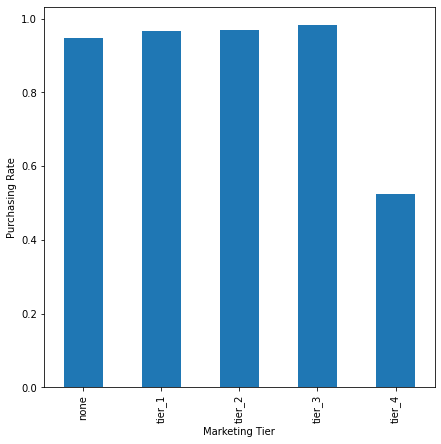

In [ ]:
ax_bymar = by_marketing.plot(kind="bar",grid=False,figsize=(7,7))
ax_bymar.set_xlabel("Marketing Tier")
ax_bymar.set_ylabel("Purchasing Rate")
plt.show()

### How many orders per day?

In [ ]:
df1.groupby(['Day'])['user_id'].count()
##this metric seems not fit since it's aggregation of day in each month of 2015

Day
01    7628
02    6419
03    6752
04    7838
05    7179
06    7515
07    8291
08    9100
09    7840
10    8658
11    6428
12    6598
13    7365
14    8500
15    9060
16    8986
17    8898
18    9635
19    8817
20    4752
21    5809
22    6246
23    6540
24    6757
25    6882
26    5148
27    6301
28    6708
29    6053
30    6355
31    3409
Name: user_id, dtype: int64

### How many orders per hour?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0]), <a list of 1 Text major ticklabel objects>)

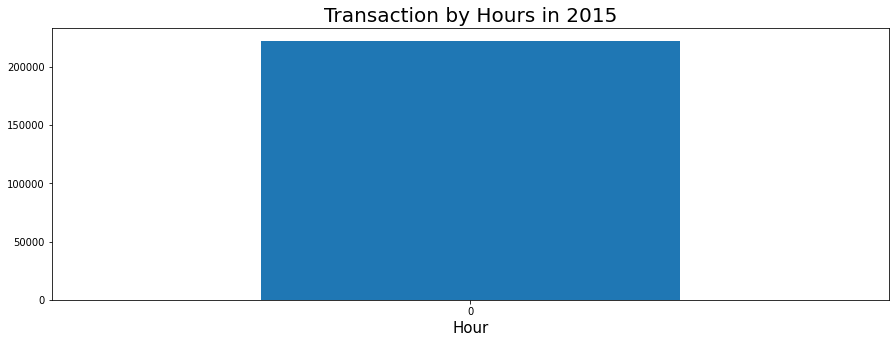

In [ ]:
from datetime import datetime
df1['Hour'] = pd.to_datetime(df1['time'], errors='coerce', utc=True).dt.hour
df1.groupby('Hour').size().plot(kind = 'bar',figsize=(15,5))
plt.title('Transaction by Hours in 2015',fontsize=20)
plt.xlabel('Hour',fontsize=15)
plt.xticks(rotation=0)

In [ ]:
df1.groupby(['Hour'])['user_id'].count()

Hour
0    222467
Name: user_id, dtype: int64

### How many orders per day in May?

In [ ]:
df_month = df1[(df1['Month'] == '2015-05') & (df1['purchase']==1)]

In [ ]:
df_day = pd.DataFrame(df_month.groupby('Day')['user_id'].count()).reset_index(inplace=False).sort_values(by='user_id', ascending = False)
df_day

,Day,user_id
7,08,3756
17,18,3682
15,16,3666
6,07,3556
3,04,3545
27,28,3528
24,25,3528
21,22,3479
14,15,3462
2,03,3459


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

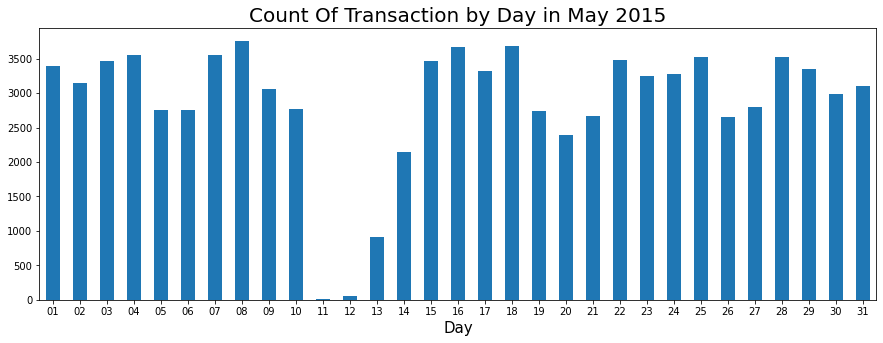

In [ ]:
df_month.groupby('Day').size().plot(kind = 'bar',figsize=(15,5))
plt.title('Count Of Transaction by Day in May 2015',fontsize=20)
plt.xlabel('Day',fontsize=15)
plt.xticks(rotation=0)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]), <a list of 10 Text major ticklabel objects>)

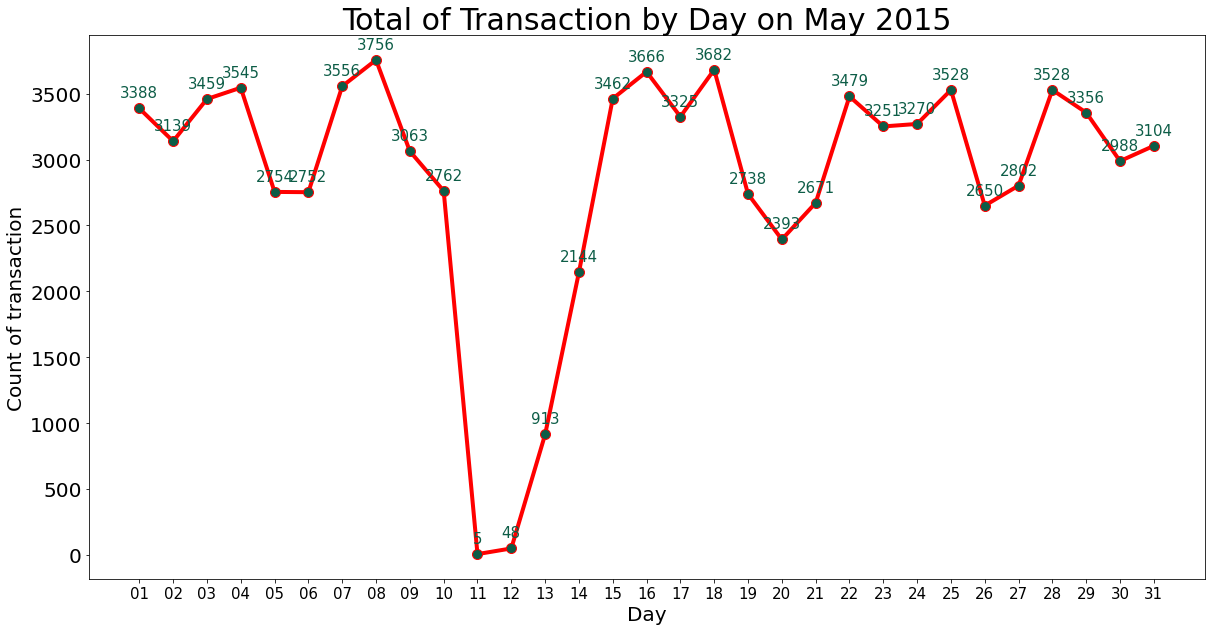

In [ ]:
df_day1 = pd.DataFrame(df_month.groupby('Day')['user_id'].count()).reset_index(inplace=False)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot('Day', 'user_id', data=df_day1, marker='o', markerfacecolor='#0D5D47', markersize=10, color='red', linewidth=4)


xs=df_day1['Day']
ys=df_day1['user_id']
for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 rotation=0,
                 textcoords="offset points", color='#0D5D47',# how to position the text
                 xytext=(0,11), fontsize=15,# distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



#Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count of transaction', fontsize=20)
plt.xlabel('Day',fontsize=20)
ax.set_title('Total of Transaction by Day on May 2015', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)


In [ ]:
df1['yy_mm_dd'] = pd.to_datetime(df1['time'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')
df_day_month = pd.DataFrame(df1.groupby('yy_mm_dd')['user_id'].count()).reset_index(inplace=False)
df_day_month.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,yy_mm_dd,user_id
0,2015-03-20,52
1,2015-03-21,827
2,2015-03-22,616
3,2015-03-23,626
4,2015-03-24,379


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text major ticklabel objects>)

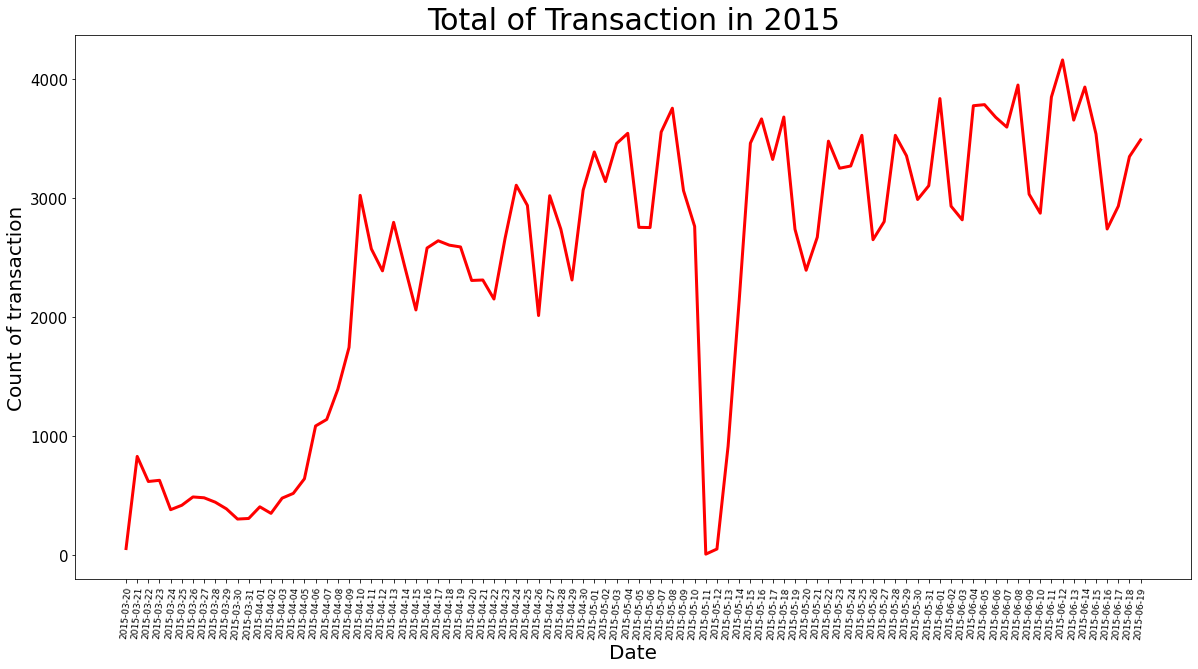

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot('yy_mm_dd', 'user_id', data=df_day_month, color='red', linewidth=3)


xs=df_day_month['yy_mm_dd']
ys=df_day_month['user_id']



#Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count of transaction', fontsize=20)
plt.xlabel('Date',fontsize=20)
ax.set_title('Total of Transaction in 2015', fontsize=30)
plt.xticks(fontsize=9, rotation=85)
plt.yticks(fontsize=15)


### How many orders per hour in May 2015?

(array([0]), <a list of 1 Text major ticklabel objects>)

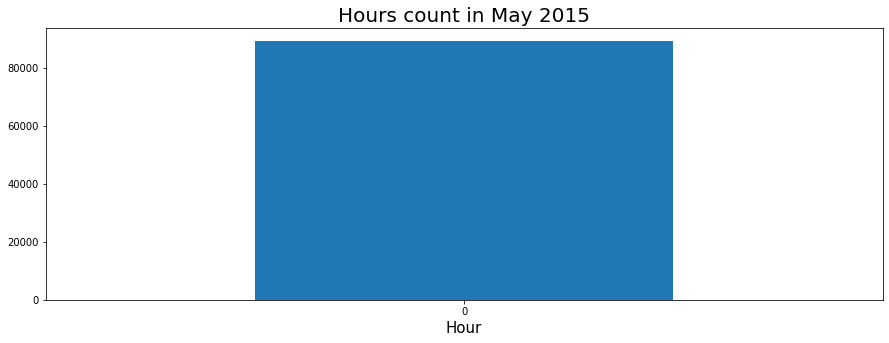

In [ ]:
df_month.groupby('Hour').size().plot(kind = 'bar',figsize=(15,5))
plt.title('Hours count in May 2015',fontsize=20)
plt.xlabel('Hour',fontsize=15)
plt.xticks(rotation=0)

In [ ]:
dates = pd.to_datetime(df1['time'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')
dates.value_counts().head(10)

2015-06-12    4162
2015-06-08    3951
2015-06-14    3934
2015-06-11    3850
2015-06-01    3837
2015-06-05    3786
2015-06-04    3777
2015-05-08    3756
2015-05-18    3682
2015-06-06    3680
Name: time, dtype: int64

In [ ]:
dates.describe()

count         222467
unique            92
top       2015-06-12
freq            4162
Name: time, dtype: object

In [ ]:
dates.max() #end date of transaction

'2015-06-19'

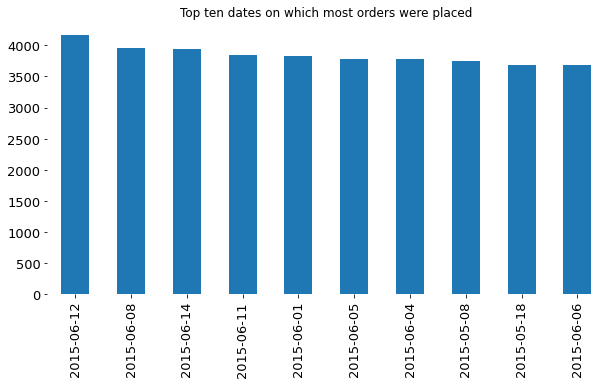

In [ ]:
import seaborn as sns
dates.value_counts().head(10).plot.bar(figsize=(10,5), fontsize=13, title='Top ten dates on which most orders were placed')
sns.despine(bottom=True, left=True)

### How many orders for each province?

In [ ]:
user_prov = pd.DataFrame(df1.groupby('province')['user_id'].count()).reset_index(inplace=False).sort_values(by='user_id', ascending = False)
user_prov


,province,user_id
1,1,92308
3,3,26319
2,2,23143
4,4,20603
0,0,18844
7,7,8861
13,13,8662
5,5,5750
8,8,5360
10,10,3637


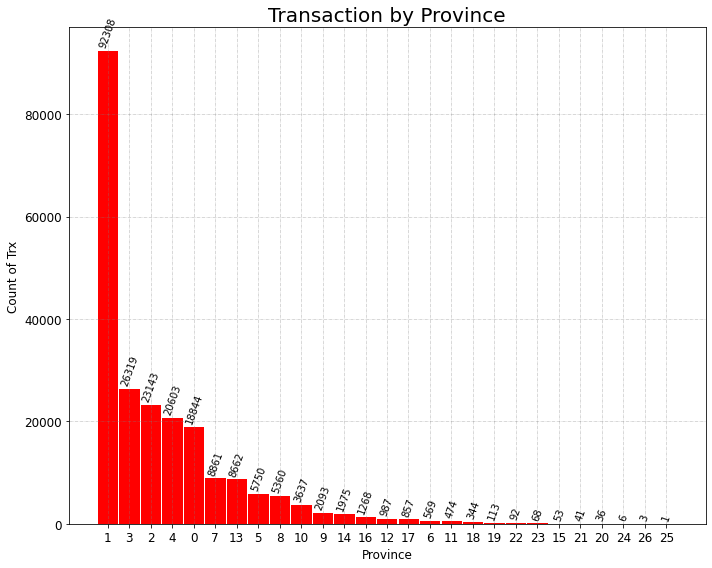

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = user_prov.province
attrate = user_prov.user_id

m = np.arange(len(labels))  # the label locations
width = 0.95  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(m + width/80, attrate, width, color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Count of Trx', fontsize=12)
plt.xlabel('Province', fontsize=12)
ax.set_title('Transaction by Province', fontsize=20)
plt.xticks(m, fontsize=12)
plt.yticks(fontsize=12)
ax.set_xticklabels(labels, fontsize=12)

# Add x, y gridlines
ax.grid(b=True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), rotation=70,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",fontsize=10,
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['is_paid'], aggfunc='count', fill_value=0)
table

is_paid,0,1
purchase,,
0,7380,0
1,1434,221033


<function matplotlib.pyplot.show>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


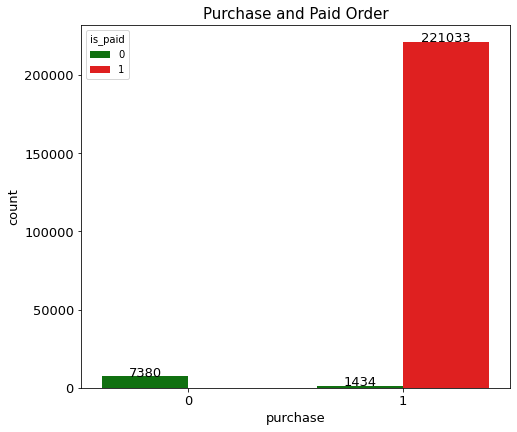

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="is_paid", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase and Paid Order', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['marketing_tier'], aggfunc='count', fill_value=0)
table

marketing_tier,none,tier_1,tier_2,tier_3,tier_4
purchase,,,,,
0,40,5122,1944,189,85
1,736,148573,62565,10499,94


<function matplotlib.pyplot.show>

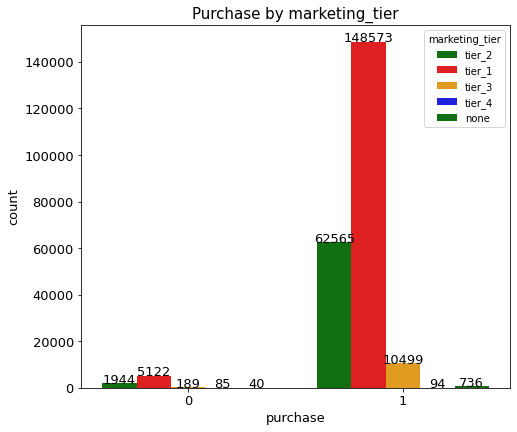

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="marketing_tier", palette=['g', 'red', 'orange', 'blue'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by marketing_tier', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['trx_is_voucher'], aggfunc='count', fill_value=0)
table

trx_is_voucher,0,1
purchase,,
0,7380,0
1,186210,36257


<function matplotlib.pyplot.show>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


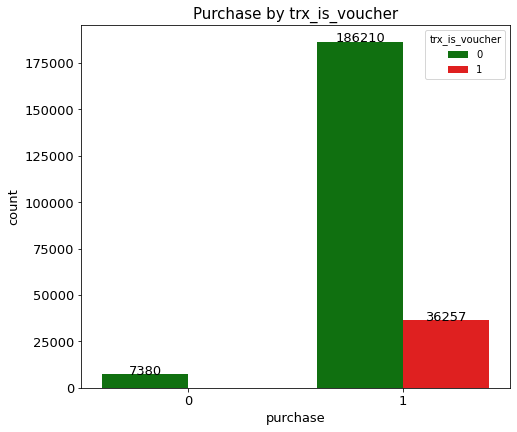

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="trx_is_voucher", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by trx_is_voucher', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


<function matplotlib.pyplot.show>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


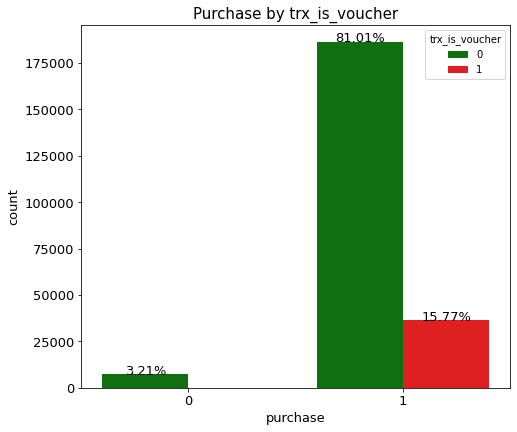

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="trx_is_voucher", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.2f}%'.format((height/total_records)*100,0), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by trx_is_voucher', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show

In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['voucher_type'], aggfunc='count', fill_value=0)
table

voucher_type,0.0,1.0,none
purchase,,,
0,135,485,6760
1,6854,31484,184129


<function matplotlib.pyplot.show>

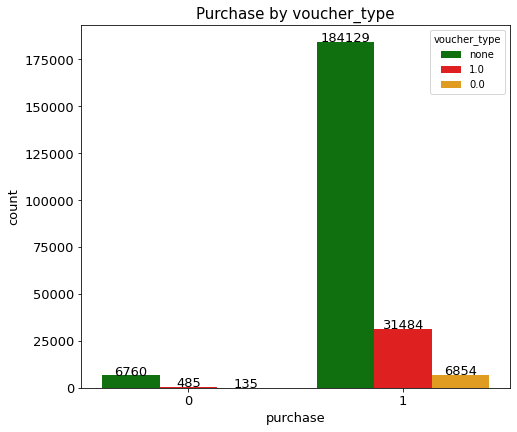

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue='voucher_type', palette=['g', 'red', 'orange'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by voucher_type', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


<function matplotlib.pyplot.show>

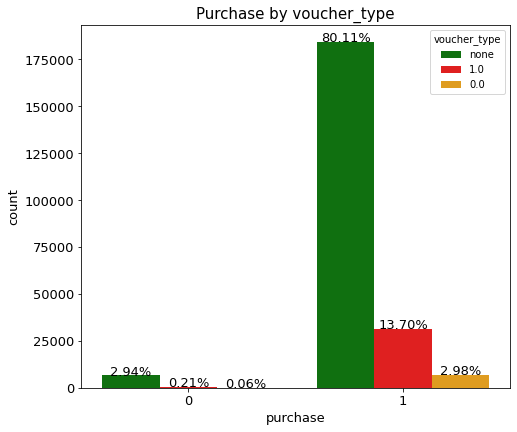

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="voucher_type", palette=['g', 'red','orange'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.2f}%'.format((height/total_records)*100,0), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by voucher_type', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show

<function matplotlib.pyplot.show>

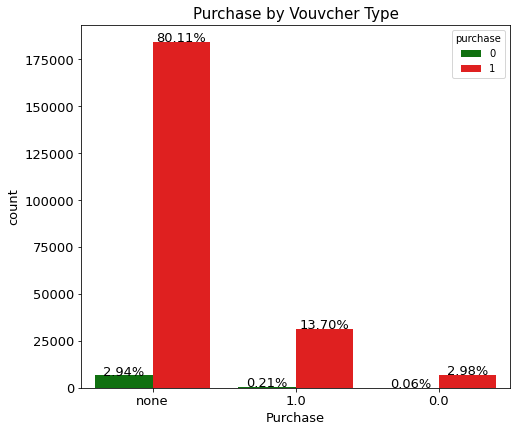

In [ ]:
total_records= len(df)
columns = ["voucher_type"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="purchase", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.2f}%'.format((height/total_records)*100,0), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by Vouvcher Type', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('Purchase', fontsize=13)
plt.show

In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['voucher_valid'], aggfunc='count', fill_value=0)
table

voucher_valid,0.0,1.0,none
purchase,,,
0,301,620,6459
1,2722,38338,181407


<function matplotlib.pyplot.show>

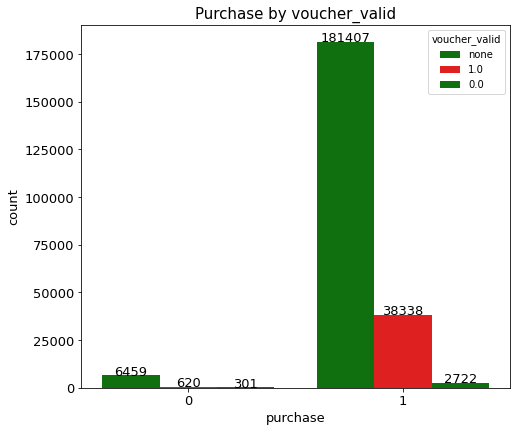

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="voucher_valid", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by voucher_valid', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['account_type'], aggfunc='count', fill_value=0)
table

account_type,0,1,2,3,4,5,6
purchase,,,,,,,
0,7336,11,0,33,0,0,0
1,221880,531,24,18,9,4,1


<function matplotlib.pyplot.show>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


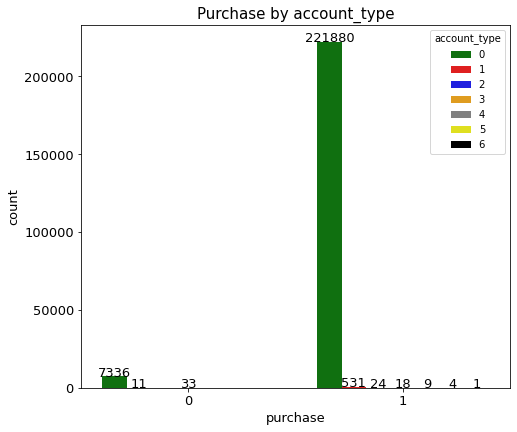

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="account_type", palette=['g', 'red','blue','orange', 'grey', 'yellow','black'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by account_type', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['is_new'], aggfunc='count', fill_value=0)
table

is_new,0,1
purchase,,
0,6714,666
1,193275,29192


<function matplotlib.pyplot.show>

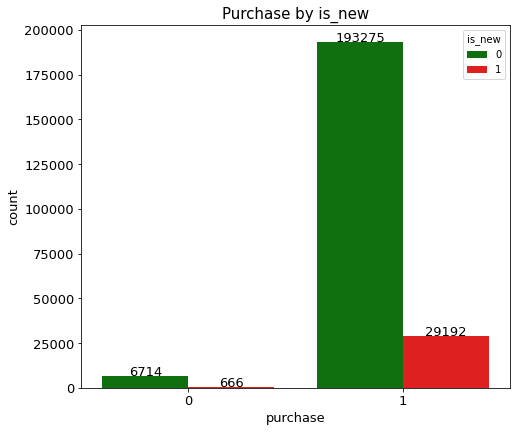

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="is_new", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by is_new', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['referrer_type'], aggfunc='count', fill_value=0)
table

referrer_type,0,1,2,3,4,5,6
purchase,,,,,,,
0,2729,2065,2357,62,84,80,3
1,78478,61639,65052,12223,2925,1316,834


<function matplotlib.pyplot.show>

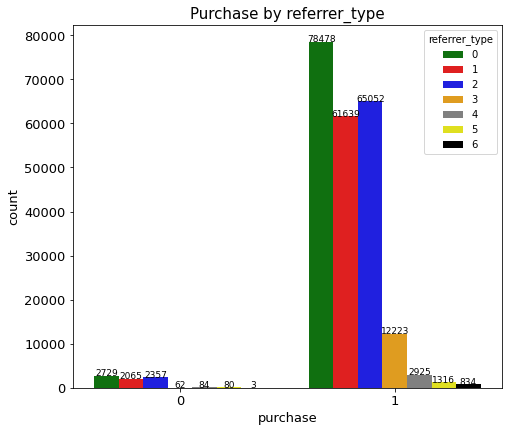

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="referrer_type", palette=['g', 'red','blue','orange', 'grey', 'yellow','black'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=9,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by referrer_type', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['user_group'], aggfunc='count', fill_value=0)
table

user_group,0,1
purchase,,
0,2809,4571
1,79794,142673


<function matplotlib.pyplot.show>

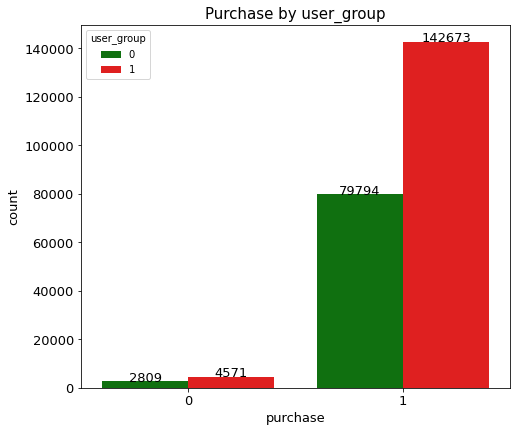

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="user_group", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by user_group', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['user_purchased_prior'], aggfunc='count', fill_value=0)
table

user_purchased_prior,0,1
purchase,,
0,2857,4523
1,81951,140516


<function matplotlib.pyplot.show>

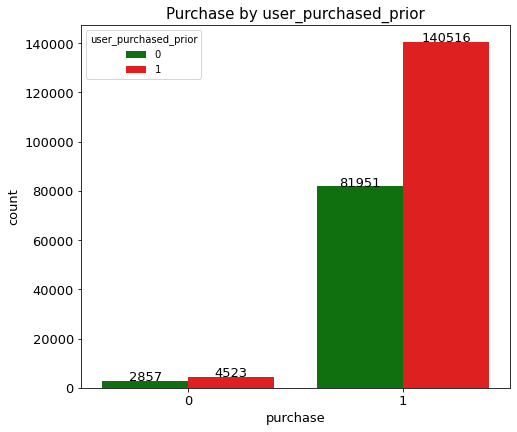

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="user_purchased_prior", palette=['g', 'red'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=13,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by user_purchased_prior', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
pd.DataFrame(df1.groupby('user_id')['gmv'].sum().describe())

,gmv
count,67917.000000
mean,0.110736
std,0.193725
min,0.033102
25%,0.033242
50%,0.033308
75%,0.099854
max,19.201074


In [ ]:
pd.DataFrame(df1.groupby('province')['user_id'].count().describe())

,user_id
count,27.000000
mean,8239.518519
std,18539.435790
min,1.000000
25%,80.000000
50%,987.000000
75%,7206.000000
max,92308.000000


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['user_register_from'], aggfunc='count', fill_value=0)
table

user_register_from,0,1,2,3,4,5,6,7
purchase,,,,,,,,
0,4783,2042,368,161,18,1,7,0
1,147389,61396,9966,3159,308,73,175,1


<function matplotlib.pyplot.show>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


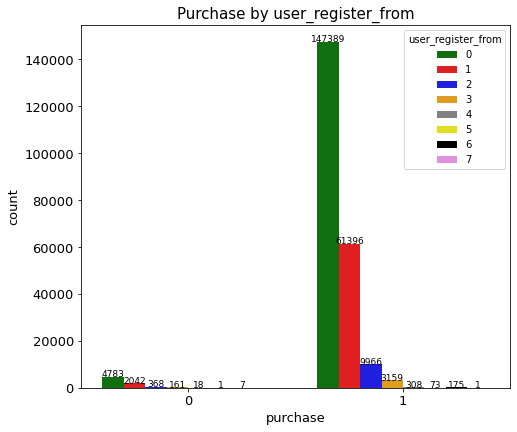

In [ ]:
total_records= len(df)
columns = ["purchase"]
plt.figure(figsize=(15,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=df,x= i,hue="user_register_from", palette=['g', 'red','blue','orange', 'grey', 'yellow','black', 'violet'])
    if(j==8 or j== 7):
        plt.xticks(rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 2,
                '{:1.0f}'.format(height), fontsize=9,
                ha="center",rotation=0)



# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2, right=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purchase by user_register_from', fontsize=15)
plt.ylabel('count',fontsize=13)
plt.xlabel('purchase', fontsize=13)
plt.show


In [ ]:
table = pd.pivot_table(df, values='user_id', index=['purchase'],
                    columns=['user_type'], aggfunc='count', fill_value=0)
table

user_type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
purchase,,,,,,,,,,,,,,,,
0,5325,857,354,296,172,129,74,50,80,35,2,2,2,0,2,0
1,169846,22296,6756,6962,4045,4880,2219,2050,2502,445,119,222,97,25,2,1


In [ ]:
user_prov = pd.DataFrame(df1.groupby('province')['user_id'].count()).reset_index(inplace=False).sort_values(by='user_id', ascending = False)
user_prov


,province,user_id
1,1,92308
3,3,26319
2,2,23143
4,4,20603
0,0,18844
7,7,8861
13,13,8662
5,5,5750
8,8,5360
10,10,3637


## RFM Analysis

**What is RFM analysis?**

RFM analysis is a customer segmentation technique that uses past purchase behavior to segment customers.

Recency (R) - Time since last purchase

Frequency (F) - Total number of purchases

Monetary value (M) - Total monetary value


To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value.

### RFM

In [ ]:
df['time']=pd.to_datetime(df['time']).dt.date

In [ ]:
## find the last date on which customer made the purchase
recency=pd.DataFrame(df.groupby('user_id')['time'].max()).reset_index(inplace=False)
recency.head()

,user_id,time
0,110,2015-04-26
1,4148,2015-06-03
2,27610,2015-04-09
3,50037,2015-05-03
4,62283,2015-06-18


In [ ]:
## we take the maximum date of purchase made by customers as the date to calculate the recency of the purchase
## 2015-06-19
recency['recent_days']=recency['time'].max()-recency['time']
recency['recent_days']=recency['recent_days'].dt.days
recency

,user_id,time,recent_days
0,110,2015-04-26,54
1,4148,2015-06-03,16
2,27610,2015-04-09,71
3,50037,2015-05-03,47
4,62283,2015-06-18,1
...,...,...,...
69301,628394330,2015-06-19,0
69302,628394506,2015-06-19,0
69303,628395038,2015-06-19,0
69304,628395638,2015-06-19,0


In [ ]:
## the number of times a unique customer has made purchase
frequency=pd.DataFrame(df.groupby('user_id')['user_id'].count())
frequency=frequency.rename(columns={'user_id':'freq',}, inplace=False)
frequency= pd.DataFrame(frequency).reset_index(inplace=False)
frequency

,user_id,freq
0,110,1
1,4148,1
2,27610,1
3,50037,1
4,62283,9
...,...,...
69301,628394330,1
69302,628394506,1
69303,628395038,1
69304,628395638,1


In [ ]:
monetary=pd.DataFrame(df[['user_id','aov']].groupby('user_id')['aov'].sum()).reset_index(inplace=False)
monetary.head()

,user_id,aov
0,110,0.155961
1,4148,0.156039
2,27610,0.155926
3,50037,0.155703
4,62283,1.401196


In [ ]:
# the receny of visit, total monetary spent and freqency of purchase by each customer is found out and merged
df_rfm=pd.merge(recency,frequency,on='user_id')
df_rfm=pd.merge(df_rfm,monetary,on='user_id')

In [ ]:
df_rfm.shape

(69306, 5)

In [ ]:
df_rfm.head()

,user_id,time,recent_days,freq,aov
0,110,2015-04-26,54,1,0.155961
1,4148,2015-06-03,16,1,0.156039
2,27610,2015-04-09,71,1,0.155926
3,50037,2015-05-03,47,1,0.155703
4,62283,2015-06-18,1,9,1.401196


In [ ]:
# Freqency - Number of purchase made
## Recency- Days from last purchase
## Monetary-- total amount purchase for by a customer
df_rfm.drop(['time'],axis=1,inplace=True)
df_rfm.reset_index(inplace=False)
df_rfm.columns=['user_id','Recency','Frequency','Monetary']
#use CustomerID as index
df_rfm.set_index('user_id',inplace=True)
df_rfm

,Recency,Frequency,Monetary
user_id,,,
110,54,1,0.155961
4148,16,1,0.156039
27610,71,1,0.155926
50037,47,1,0.155703
62283,1,9,1.401196
...,...,...,...
628394330,0,1,0.155619
628394506,0,1,0.155619
628395038,0,1,0.155619


In [ ]:
#user check with order requency = 9
user_check = df[df['user_id']== 62283]
user_check

,user_id,is_new,time,voucher_type,voucher_valid,basket_amount,voucher_max_amount,voucher_percentage,voucher_min_purchase,voucher_amount,trx_is_voucher,is_paid,is_remitted,user_purchased_prior,num_voucher_errors,purchase,province,marketing_tier,user_type,user_group,account_type,referrer_type,account_created_at,user_register_from,sessions,average_session_length,num_visit_promo_page,num_product_types,num_trx,num_trx_voucher,gmv,aov,marketing_tier_code,cvr,cvr_convert,Month,length_of_membership
21070,62283,0,2015-05-07,none,none,0.000018,0.0000,0.0,0.00,0.000000,0,1,1,1,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.038684,0.002722,0.006757,0.193548,0.000489,0.036952,0.033357,0.155688,2,1.264438,1.264438,05,8.635616
21071,62283,0,2015-05-03,1,1,0.000046,0.0002,2.0,0.01,0.010026,1,1,1,0,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.038684,0.002722,0.006757,0.193548,0.000489,0.036952,0.033357,0.155688,2,1.264438,1.264438,05,8.635616
78025,62283,0,2015-06-18,1,1,0.000045,0.0002,2.0,0.01,0.009605,1,1,1,1,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.035792,0.002807,0.006757,0.161290,0.000487,0.027714,0.033349,0.155683,2,1.361148,1.361148,06,8.635616
78026,62283,0,2015-06-10,none,none,0.000018,0.0000,0.0,0.00,0.000000,0,1,1,1,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.035792,0.002807,0.006757,0.161290,0.000487,0.027714,0.033349,0.155683,2,1.361148,1.361148,06,8.635616
78027,62283,0,2015-05-21,none,none,0.000022,0.0000,0.0,0.00,0.000000,0,1,1,0,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.035792,0.002807,0.006757,0.161290,0.000487,0.027714,0.033349,0.155683,2,1.361148,1.361148,05,8.635616
78028,62283,0,2015-05-30,1,1,0.000049,0.0002,2.0,0.01,0.010858,1,1,1,1,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.035792,0.002807,0.006757,0.161290,0.000487,0.027714,0.033349,0.155683,2,1.361148,1.361148,05,8.635616
78029,62283,0,2015-06-02,none,none,0.000015,0.0000,0.0,0.00,0.000000,0,1,1,1,0,1,0,tier_2,0,0,0,0,2006-11-01,0,0.035792,0.002807,0.006757,0.161290,0.000487,0.027714,0.033349,0.155683,2,1.361148,1.361148,06,8.635616
201979,62283,0,2015-04-12,none,none,0.000070,0.0000,0.0,0.00,0.000000,0,1,1,1,1,1,0,tier_2,0,0,0,0,2006-11-01,0,0.038322,0.002376,0.000000,0.258065,0.000497,0.055427,0.033385,0.155703,2,1.296788,1.296788,04,8.635616
201980,62283,0,2015-04-12,none,none,0.000006,0.0000,0.0,0.00,0.000000,0,1,1,1,1,1,0,tier_2,0,0,0,0,2006-11-01,0,0.038322,0.002376,0.000000,0.258065,0.000497,0.055427,0.033385,0.155703,2,1.296788,1.296788,04,8.635616


In [ ]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,69306.000000,69306.000000,69306.000000
mean,27.415116,3.316408,0.520054
std,23.102126,5.445175,0.859057
min,0.000000,1.000000,0.153525
25%,7.000000,1.000000,0.155619
50%,21.000000,1.000000,0.156250
75%,46.000000,3.000000,0.468544
max,91.000000,474.000000,74.086859


In [ ]:
(df_rfm[df_rfm['Frequency']>1].shape[0]/69306)*100

45.11442010792716

we can see that around 55% of customers are one time customers and only 45% where recurring customers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


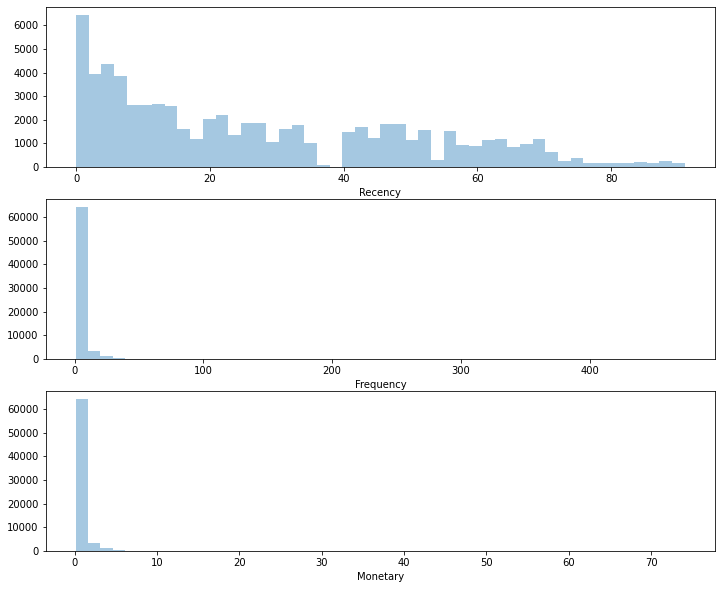

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recency'],kde=False)
# Plot distribution of F
plt.subplot(3,1,2); sns.distplot(df_rfm['Frequency'],kde=False)
# Plot distribution of M
plt.subplot(3,1,3); sns.distplot(df_rfm['Monetary'],kde=False)
# Show the plot
plt.show()

### RFM Quartiles
The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,7.0,1.0,0.155619
0.50,21.0,1.0,0.156250
0.75,46.0,3.0,0.468544


In [ ]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 3.0},
 'Monetary': {0.25: 0.15561851243389827,
  0.5: 0.15624998796748718,
  0.75: 0.4685435742614441},
 'Recency': {0.25: 7.0, 0.5: 21.0, 0.75: 46.0}}

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation table
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
user_id,,,,,,,
110,54,1,0.155961,1,1,2,112
4148,16,1,0.156039,3,1,2,312
27610,71,1,0.155926,1,1,2,112
50037,47,1,0.155703,1,1,2,112
62283,1,9,1.401196,4,4,4,444


In [ ]:
### how many customers are in each segment

print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  8774
Loyal Customers:  15575
Big Spenders:  17327
Almost Lost:  2063
Lost Customers:  908
Lost Cheap Customers:  7268


In [ ]:
segment = []
for i in rfm_segmentation['RFMScore']:
  if i == '111':
    segment.append('Best Customers')
  elif i == '444':
    segment.append('Lost Cheap Customers')
  elif i == '411':
    segment.append('Lost Customers')
  elif i == '311':
    segment.append('Almost Lost')
  elif i in ['211','212','213','214','312','312', '313','314','412','413','414','344','244','433', '434']:
    segment.append('Loyal Customers')
  elif i in  ['121','131', '141']:
    segment.append('Big Spenders')
  elif i in ['122','133','144','134','124', '112','113','114']:
    segment.append('Recent Customers')
  else:
    segment.append('Others')

In [ ]:
rfm_segmentation['customers_segment'] = segment

In [ ]:
rfm_segmentation['RFMScore'].unique()

array(['112', '312', '444', '233', '344', '412', '244', '434', '433',
       '211', '212', '111', '311', '144', '333', '133', '213', '113',
       '313', '234', '411', '334', '134', '413'], dtype=object)

In [ ]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,customers_segment
user_id,,,,,,,,
110,54,1,0.155961,1,1,2,112,Recent Customers
4148,16,1,0.156039,3,1,2,312,Loyal Customers
27610,71,1,0.155926,1,1,2,112,Recent Customers
50037,47,1,0.155703,1,1,2,112,Recent Customers
62283,1,9,1.401196,4,4,4,444,Lost Cheap Customers


In [ ]:
#download_rfm=pd.to_excel()

### correlation matrix for best customers

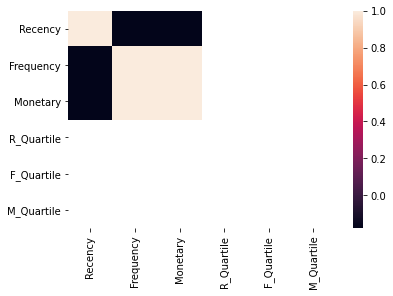

In [ ]:
best_cust=rfm_segmentation[rfm_segmentation['RFMScore']=='444']
#calculate and show correlations
corr_matrix = best_cust.corr()
sns.heatmap(corr_matrix)

There are nan values in correlation values of quartile ranges ,it is becuase the standard deviation is zero since values are all 4

### Descriptive Statistics of Customers

In [ ]:
# the count, mean, standard deviation,minimum, maximum,qunatiles are displayed of the total spend by customers
pd.DataFrame(df1.groupby('user_id')['num_trx'].sum().describe())

,num_trx
count,67917.000000
mean,0.000981
std,0.009083
min,0.000000
25%,0.000000
50%,0.000006
75%,0.000147
max,1.483387


In [ ]:
pd.DataFrame(df1.groupby('user_id')['basket_amount'].sum().describe())

,basket_amount
count,67917.000000
mean,0.000266
std,0.006405
min,0.000000
25%,0.000012
50%,0.000033
75%,0.000114
max,1.000163


## Correlation Analysis

### Purchasing

In [ ]:
# columns with continious data
cont_var = ['basket_amount','trx_is_voucher','voucher_amount','voucher_max_amount','voucher_min_purchase','cvr_convert',
            'voucher_percentage','average_session_length', 'is_new','num_visit_promo_page','account_type',
            'num_trx','num_trx_voucher', 'marketing_tier_code','user_register_from','user_group','num_product_types',
            'num_voucher_errors','province','referrer_type','sessions','user_purchased_prior','user_type','purchase']
variables = df[cont_var]

In [ ]:
variables.shape

(229847, 24)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text major ticklabel objects>)

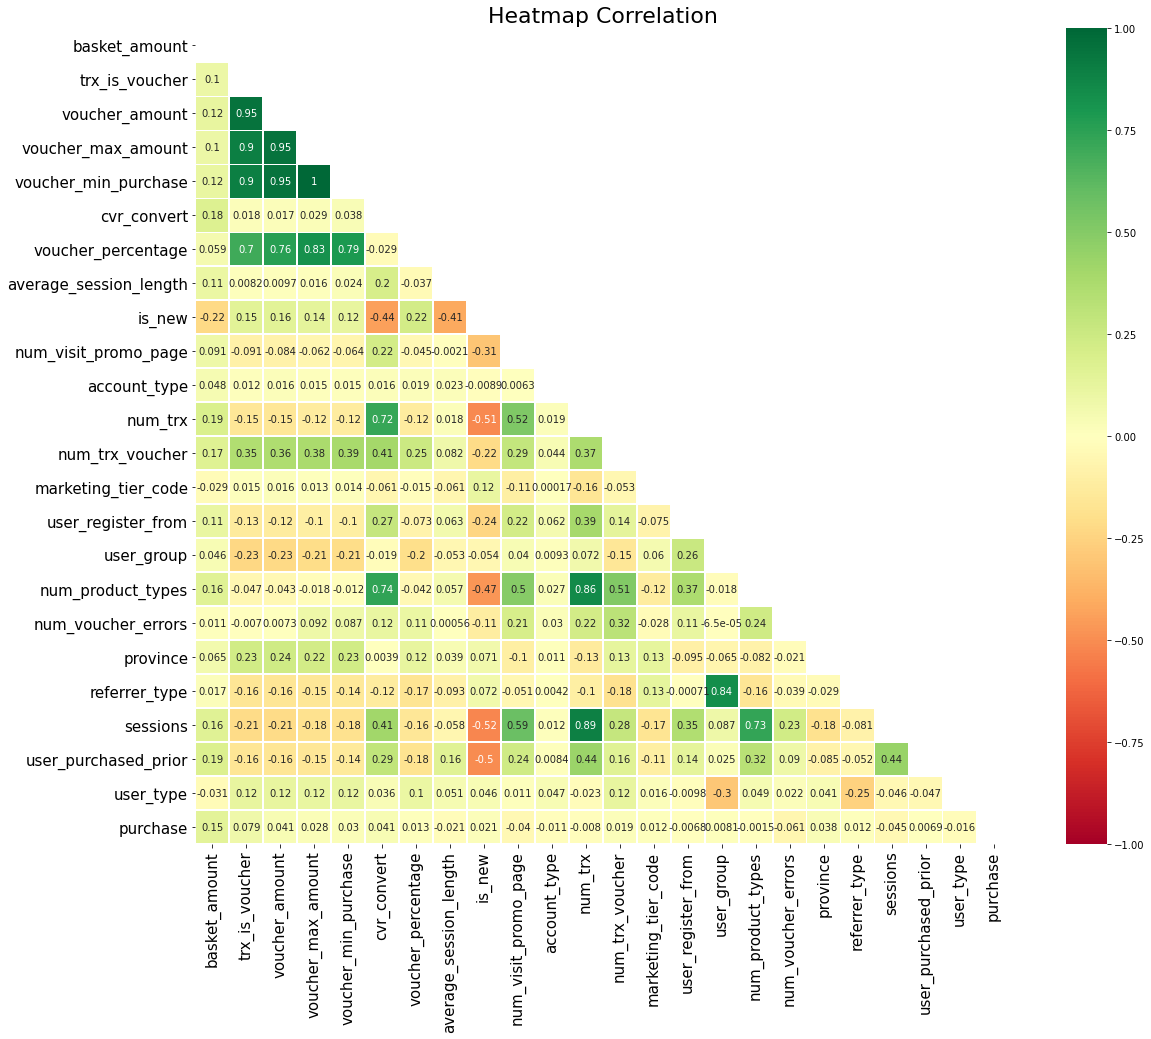

In [ ]:
import seaborn as sns
corr = variables.corr('spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 10})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

### Basket Amount

In [ ]:

feature_var2 = df[['is_new', 'num_trx', 'num_trx_voucher', 'sessions',
                   'user_purchased_prior', 'purchase', 'trx_is_voucher',
                   'voucher_amount', 'voucher_max_amount','marketing_tier_code',
                   'voucher_min_purchase', 'average_session_length', 'basket_amount']]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text major ticklabel objects>)

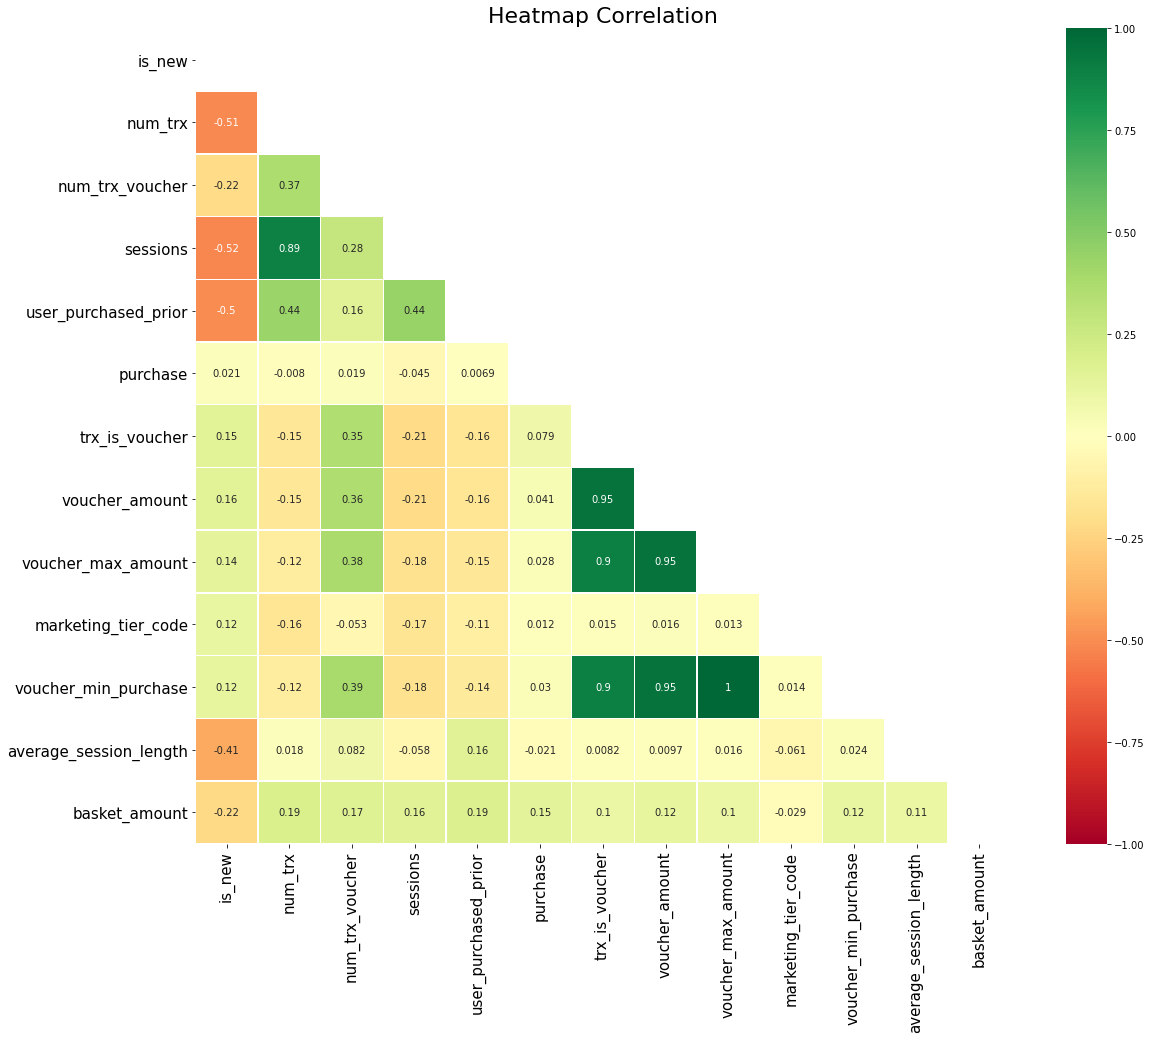

In [ ]:
import seaborn as sns
corr = feature_var2.corr('spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 10})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

## Hypothetical Testing

**Generate and validate hypothesis of users making a purchase**

We now perform some statistical tests to infer users making a purchase. To perform these tests, we have the following variables:

Dependent variable: purchase with levels YES (1) or NO (0)

Independent variable: numerical feature of the dataset

We perform t-tests on independent sample. To do this, we use the ttest_ind function in Python's scipy.stats library, since performs the t-test on two independet samples.

Note that it is rational to use t-test for even large sample (size  𝑛>30), because the population variance is unknown. As  𝑛 increases, t approaches to z, and t distribution simply becomes z distribution. In other words, with large 𝑛, t-test is just close to z test and one don't loose anything to continue to use t test.

In [ ]:
# Import packages for data analysis
import os
import tarfile
from six.moves import urllib

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# function for plotting distribution of data
from scipy.stats import ttest_ind
from matplotlib.pyplot import figure, subplot

# separate dataset purchase Y/N
dataset_purchase_Y = df.loc[df['purchase'] == 1]
dataset_purchase_N = df.loc[df['purchase'] == 0]

def plot_samples(attribute):

    # plot options
    label_font = 18

    # select independent samples
    sample_Y = dataset_purchase_Y[attribute]
    sample_N = dataset_purchase_N[attribute]


    # Plot
    data = [sample_Y,sample_N]

    figure(figsize=(17,5))
    plt.suptitle('Distribution of '+ attribute, fontsize=label_font+2)
    p1 = subplot(1,2,1)
    # Box plot
    box = plt.boxplot(data,patch_artist=True)
    colors = ['red', '#1EEB65']

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.ylabel(attribute,fontsize=label_font)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.xlabel("Purchase",fontsize=label_font)
    p1.set_xticklabels(['YES','NO'])


    # Distribution
    p2 = subplot(1,2,2)
    sns.kdeplot(sample_Y,color ='red', shade = "True", label="Purchase: YES")
    sns.kdeplot(sample_N,color ='g', shade = "True", label="Purchase: NO")
    plt.xlabel(attribute,fontsize=label_font)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12)

    return

In [ ]:
# Define function for running hypothesis test
# We use scipy's ttest_ind. Note that it performs the two-tailed test only. To perform the one tailed, we must consider
# the relationship p_twotail = 2 * p_onetail
from scipy.stats import ttest_ind
from IPython.display import display
from pandas import DataFrame



def run_ztest(s1,s2,attribute,alpha,hyp,order):

    # hyp defines is the test is one tailed or two tailed.
    # In case of one-tailed, H0: s1<=s2; H1: s1>s2  (right positive, therefore t>0)
    # In case of two-taled, H0: s1=s2; H1: s1!=s2

    # perform t-test
    res = ttest_ind(s1,s2)
    t = res[0]
    p = res[1]

    if hyp=='one':
        # one tailed right test
        p = p/2
        null = 'mean_'+order[0]+'<=mean_'+order[1]
    else:
        null = 'mean_Y=mean_N'

    if p<alpha:
        result = 'H0: rejected'
    else:
        result = 'H0: accepted'

    # Print table of descriptive statistics using PrettyTable
    display(DataFrame(data=[{"H_0":null, "t-value" : t, "p-value" : p, "alpha":alpha, "Test result": result}],
                      columns=["H_0","t-value", "p-value","alpha","Test result"], index=[attribute]).round(2))


,H_0,t-value,p-value,alpha,Test result
is_new,mean_Y=mean_N,10.3,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
is_new,mean_N<=mean_Y,-10.3,0.0,0.05,H0: rejected


Min is_new :0
Mean is_new :0.0
Max is_new :1


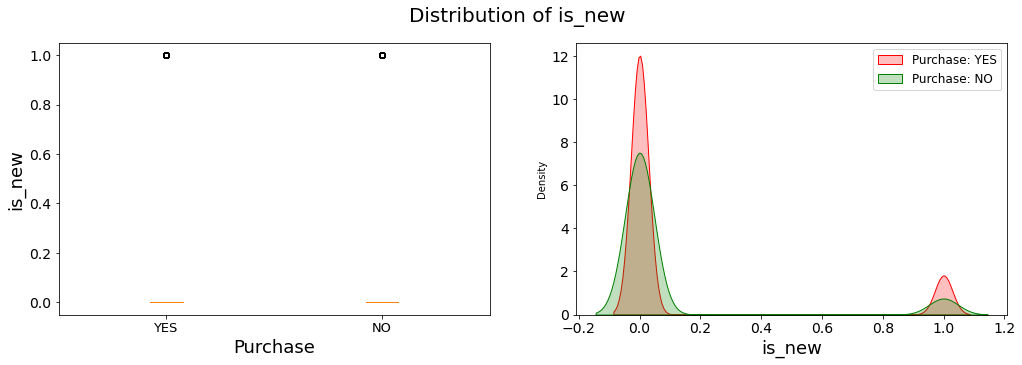

In [ ]:
# average_session_length
attr = 'is_new'
plot_samples(attr)

# run test
s_Y = dataset_purchase_Y[attr]
s_N = dataset_purchase_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

print('Min', attr, ":" +str(min(df[attr])))
print('Mean', attr, ":"+str(round(df[attr].mean(), 0)))
print('Max', attr, ":" +str(max(df[attr])))

,H_0,t-value,p-value,alpha,Test result
user_purchased_prior,mean_Y=mean_N,3.28,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
user_purchased_prior,mean_N<=mean_Y,-3.28,0.0,0.05,H0: rejected


Min user_purchased_prior :0
Mean user_purchased_prior :1.0
Max user_purchased_prior :1


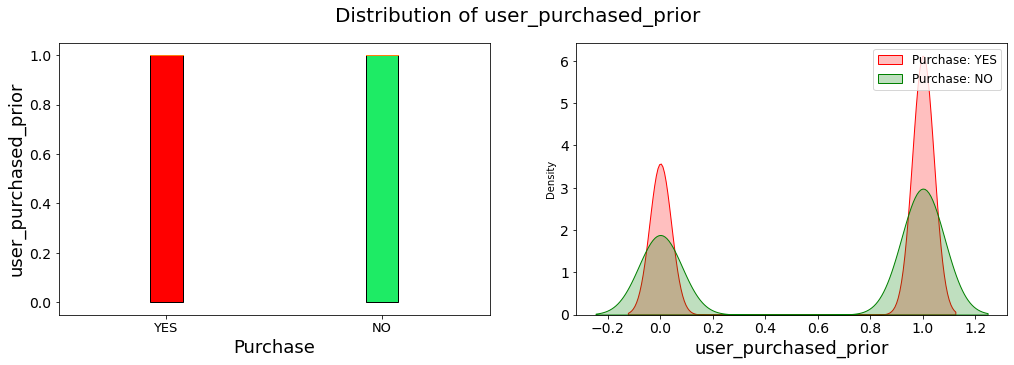

In [ ]:
# Voucher Amount
attr = 'user_purchased_prior'
plot_samples(attr)

# run test
s_Y = dataset_purchase_Y[attr]
s_N = dataset_purchase_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

print('Min', attr, ":" +str(min(df[attr])))
print('Mean', attr, ":"+str(round(df[attr].mean(), 0)))
print('Max', attr, ":" +str(max(df[attr])))

,H_0,t-value,p-value,alpha,Test result
num_visit_promo_page,mean_Y=mean_N,-13.57,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
num_visit_promo_page,mean_N<=mean_Y,13.57,0.0,0.05,H0: rejected


Min num_visit_promo_page :0.0
Mean num_visit_promo_page :0.0
Max num_visit_promo_page :1.0


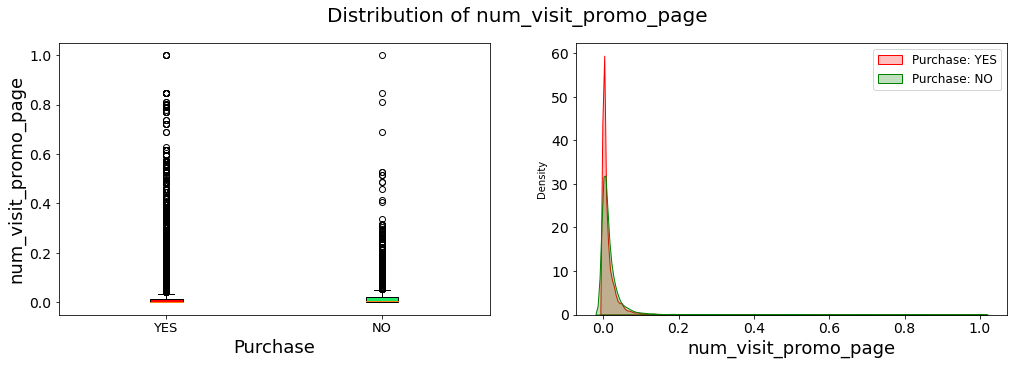

In [ ]:
# num_visit_promo_page
attr = 'num_visit_promo_page'
plot_samples(attr)

# run test
s_Y = dataset_purchase_Y[attr]
s_N = dataset_purchase_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

print('Min', attr, ":" +str(min(df[attr])))
print('Mean', attr, ":"+str(round(df[attr].mean(), 0)))
print('Max', attr, ":" +str(max(df[attr])))

,H_0,t-value,p-value,alpha,Test result
province,mean_Y=mean_N,17.33,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
province,mean_N<=mean_Y,-17.33,0.0,0.05,H0: rejected


Min province :0
Mean province :3.0
Max province :26


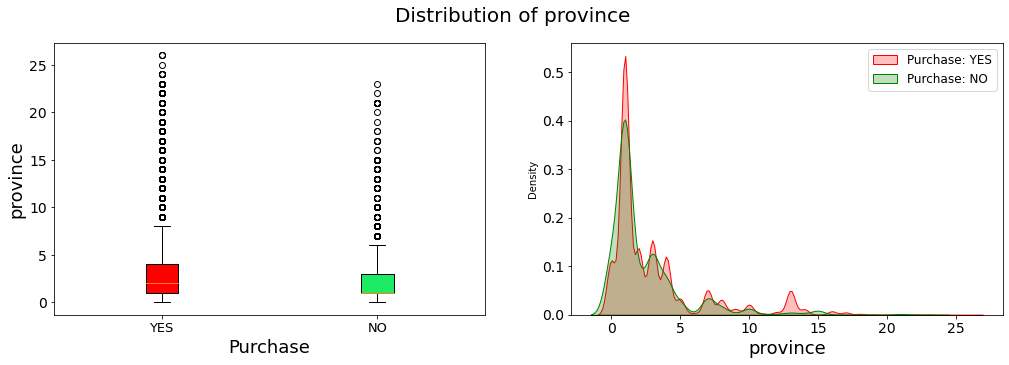

In [ ]:
# province
attr = 'province'
plot_samples(attr)

# run test
s_Y = dataset_purchase_Y[attr]
s_N = dataset_purchase_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

print('Min', attr, ":" +str(min(df[attr])))
print('Mean', attr, ":"+str(round(df[attr].mean(), 0)))
print('Max', attr, ":" +str(max(df[attr])))

,H_0,t-value,p-value,alpha,Test result
marketing_tier_code,mean_Y=mean_N,4.33,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
marketing_tier_code,mean_N<=mean_Y,-4.33,0.0,0.05,H0: rejected


Min marketing_tier_code :0
Mean marketing_tier_code :1.0
Max marketing_tier_code :4


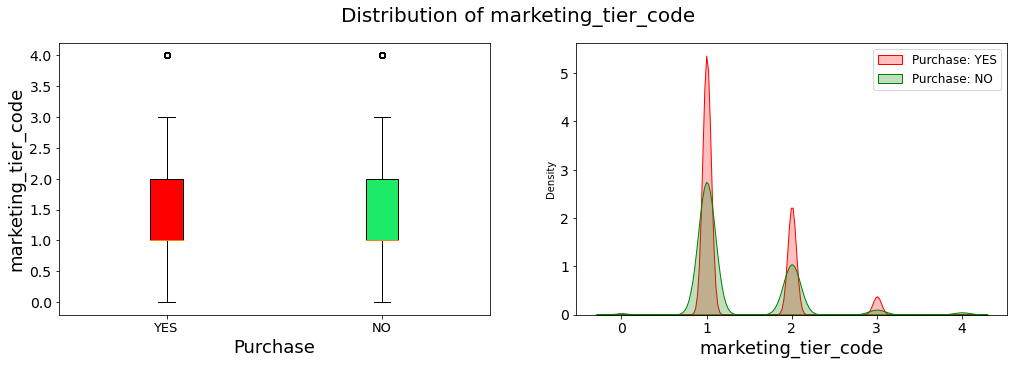

In [ ]:
# marketing_tier_code
attr = 'marketing_tier_code'
plot_samples(attr)

# run test
s_Y = dataset_purchase_Y[attr]
s_N = dataset_purchase_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

print('Min', attr, ":" +str(min(df[attr])))
print('Mean', attr, ":"+str(round(df[attr].mean(), 0)))
print('Max', attr, ":" +str(max(df[attr])))

,H_0,t-value,p-value,alpha,Test result
num_voucher_errors,mean_Y=mean_N,-21.4,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
num_voucher_errors,mean_N<=mean_Y,21.4,0.0,0.05,H0: rejected


Min num_voucher_errors :0
Mean num_voucher_errors :1.0
Max num_voucher_errors :255


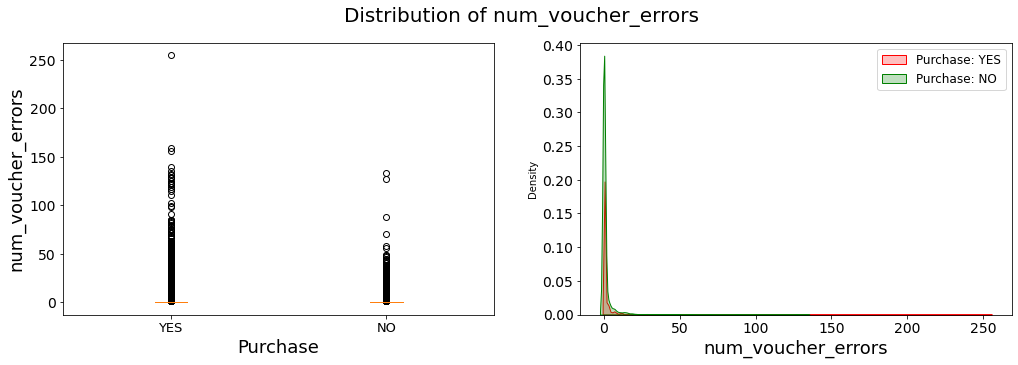

In [ ]:
# trx_is_voucher'
attr = 'num_voucher_errors'
plot_samples(attr)

# run test
s_Y = dataset_purchase_Y[attr]
s_N = dataset_purchase_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

print('Min', attr, ":" +str(min(df[attr])))
print('Mean', attr, ":"+str(round(df[attr].mean(), 0)))
print('Max', attr, ":" +str(max(df[attr])))

## Regression Analysis

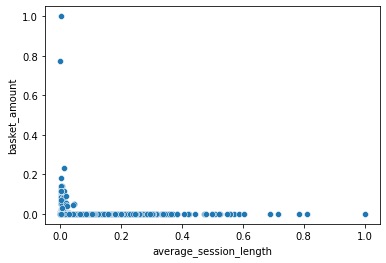

In [ ]:
#we visualize scatterplot with one input Avg. Session Length  and output
#Basket Amount
sns.scatterplot(data=df,x="average_session_length",y="basket_amount")
plt.show()

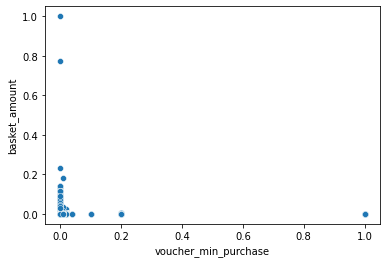

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="voucher_min_purchase",y="basket_amount")
plt.show()

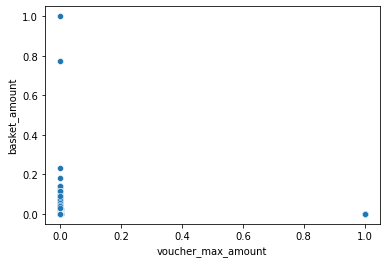

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="voucher_max_amount",y="basket_amount")
plt.show()

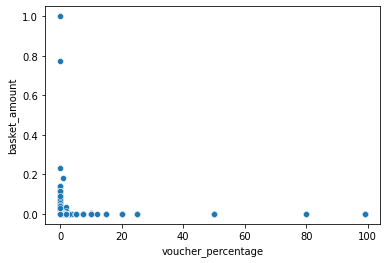

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="voucher_percentage",y="basket_amount")
plt.show()

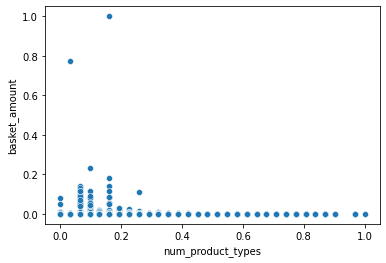

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="num_product_types",y="basket_amount")
plt.show()

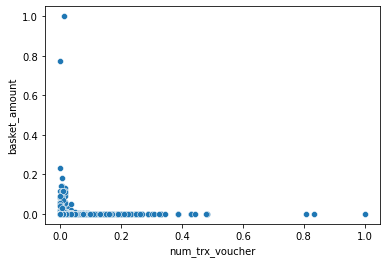

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="num_trx_voucher",y="basket_amount")
plt.show()

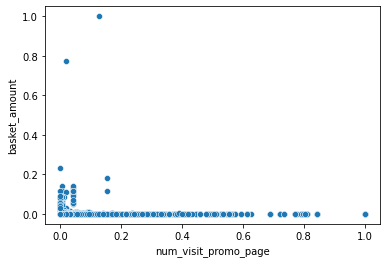

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="num_visit_promo_page",y="basket_amount")
plt.show()

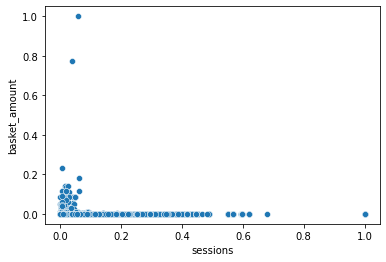

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="sessions",y="basket_amount")
plt.show()

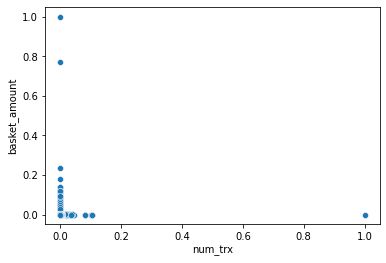

In [ ]:
#Basket Amount
sns.scatterplot(data=df,x="num_trx",y="basket_amount")
plt.show()

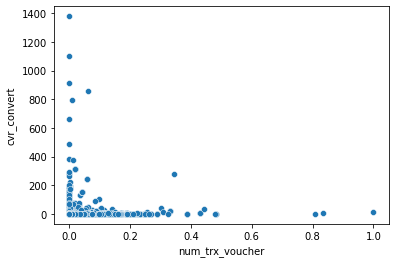

In [ ]:
#CVR
sns.scatterplot(data=df,x="num_trx_voucher",y="cvr_convert")
plt.show()

### Multivariate Regression
Y1 = Basket amount

Y2 = CVR

In [ ]:
#assumption of linear regression
#1. There are no multicolinearity  : fullfill
#2 assumption of Linear regression : there should be linear-relationship between varibale X & Y
#3. Assumption : there should be a normal distributed curve means
#all these assimption has fullfilled

**CVR**

In [ ]:
#CVR

#we will separate independent and dependent variable
#means select input and output variable from df
X = df[['num_trx_voucher', 'num_visit_promo_page', 'num_product_types']]
Y= df['cvr_convert']

In [ ]:
from sklearn.model_selection import train_test_split

#train test split
#now we will arrange to train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

#we will call the linear regression class
from sklearn.linear_model import LinearRegression

#create object of LinearRegression
lr=LinearRegression()

#we will train data now
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#we will test the data now
y_pred=lr.predict(X_test)

#Mean Squared Error Check
from sklearn.metrics import mean_squared_error
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
print("Mean Squared Error :",mse)

Mean Squared Error : 46.63917303132562


In [ ]:
X.columns

Index(['num_trx_voucher', 'num_visit_promo_page', 'num_product_types'], dtype='object')

In [ ]:
#check intercept
lr.intercept_

0.12117866401476785

In [ ]:
from statsmodels.api import OLS
model = OLS(Y_train, X_train)
result = model.fit()
print(result.summary())

print("\nSci-Kit Learn Method")
lr.fit(X_train, Y_train)
print(lr.coef_)
print(lr.intercept_)

                                 OLS Regression Results                                
Dep. Variable:            cvr_convert   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              1687.
Date:                Sun, 02 May 2021   Prob (F-statistic):                        0.00
Time:                        21:43:26   Log-Likelihood:                     -5.9172e+05
No. Observations:              183877   AIC:                                  1.183e+06
Df Residuals:                  183874   BIC:                                  1.183e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

increasing "Number of voucher transaction the user has had prior to the checkout event" by one unit increases CVR by 3.28%


increasing "Number of visit promo pages" by one unit (time) decreases CVR by 5.83%. It indicates that promo page previously is not interesting. It should be covered with a cosmetic altruristic on the app page to catch users attention.


increasing "Number of product types the user has purchased prior to the checkout event" by one unit increases CVR by 6%



**Basket Amount**

In [ ]:
#we will separate independent and dependent variable
#means select input and output variable from df
X = df[['voucher_min_purchase', 'num_trx_voucher', 'average_session_length','num_visit_promo_page']]
Y= df['basket_amount']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train test split
#now we will arrange to train and test the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [ ]:
#we will call the linear regression class
from sklearn.linear_model import LinearRegression

In [ ]:
#create object of LinearRegression
lr=LinearRegression()

In [ ]:
#we will train data now
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#we will test the data now
y_pred=lr.predict(X_test)

In [ ]:
#Mean Squared Error Check
from sklearn.metrics import mean_squared_error
#mean_squared_Error
mse=mean_squared_error(Y_test,y_pred)  #mse=RSS/no. of datapoint
print("Mean Squared Error :",mse)

Mean Squared Error : 1.0737593691578555e-06


Mean Squared Error is very low

In [ ]:
#evaluation method of LinearRegression then use R2-score inbuilt method :
from sklearn.metrics import r2_score

In [ ]:
X.columns

Index(['voucher_min_purchase', 'num_trx_voucher', 'average_session_length',
       'num_visit_promo_page'],
      dtype='object')

In [ ]:
from statsmodels.api import OLS
model = OLS(Y_train, X_train)
result = model.fit()
print(result.summary())

print("\nSci-Kit Learn Method")
lr.fit(X_train, Y_train)
print(lr.coef_)
print(lr.intercept_)

                                 OLS Regression Results                                
Dep. Variable:          basket_amount   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              34.85
Date:                Sun, 02 May 2021   Prob (F-statistic):                    3.90e-29
Time:                        21:43:26   Log-Likelihood:                      7.9013e+05
No. Observations:              183877   AIC:                                 -1.580e+06
Df Residuals:                  183873   BIC:                                 -1.580e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

increasing "Number of voucher with minimum purchase" by one unit increases  basket amount by 0.002 unit (standard deviation)


increasing "Number of voucher transaction the user has had prior to the checkout event" by one unit  increase basket amount by 0.0019 unit (standard deviation)


increasing "Average session length " by one unit increases basket amount by 0.0017 unit (standard deviation)


increasing "Number of visit promo pages " by one unit (time) will increase basket amount by 0.0016 unit (standard deviation)

### Logistic Regression
Purchasing

### Feature Importance

In [ ]:
# we can select importance features by using Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
feature_var = df[['is_new','marketing_tier_code','num_voucher_errors','user_purchased_prior']]
pred_var = df['purchase']
model.fit(feature_var,pred_var.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
featimp = pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)
print(featimp)

num_voucher_errors      0.522668
marketing_tier_code     0.348799
is_new                  0.068995
user_purchased_prior    0.059538
dtype: float64


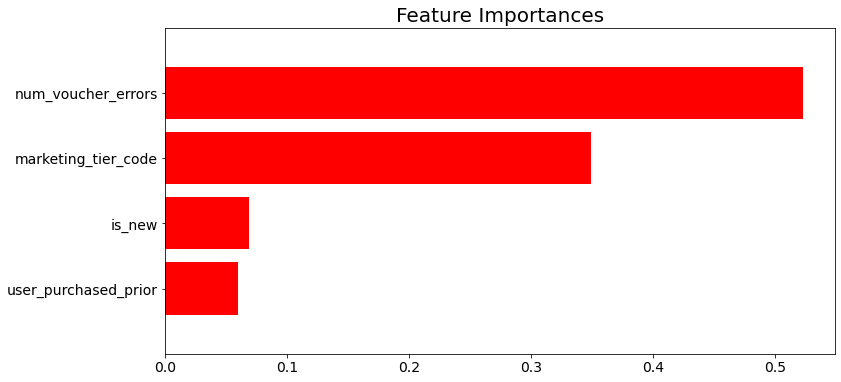

In [ ]:
## plot the importances ##
importances =model.feature_importances_
feat_names = feature_var.columns


indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title("Feature Importances", fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red',  align="center")
plt.yticks(range(len(indices)), feat_names[indices],fontsize=14)
plt.xticks(fontsize=14)
plt.ylim([-1, len(indices)])
plt.show()

In [ ]:
feature_var = df[['is_new','marketing_tier_code','num_voucher_errors','user_purchased_prior']]
pred_var = df['purchase']

### Over-sampling using SMOTE

In [ ]:
X = feature_var
y = pred_var

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no purchase in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of purchase",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no purchase data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of purchase data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  356000
Number of no purchase in oversampled data 178000
Number of purchase 178000
Proportion of no purchase data in oversampled data is  0.5
Proportion of purchase data in oversampled data is  0.5


### Recursive Feature Elimination

In [ ]:
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


In [ ]:
cols=['is_new','marketing_tier_code','num_voucher_errors','user_purchased_prior']
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.685528
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.011      
Dependent Variable:  y                 AIC:               488104.2317
Date:                2021-05-02 21:43  BIC:               488147.3625
No. Observations:    356000            Log-Likelihood:    -2.4405e+05
Df Model:            3                 LL-Null:           -2.4676e+05
Df Residuals:        355996            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      5.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
is_new                0.4547   0.0118  38.4070 0.0000  0.4315  0.4779
marketing_tier_c

The p-value for most of the variables are smaller that 0.05.

### Model Interpretation

The user who has purchased prior 57.6% (1 - e(0.4547) ) more odds of the user who hasn't purchased prior in making a purchase again.


Going up from 1 level of marketing tier to the next is associated with a decrease of 5%  in the odds of making a purchase.


An increase of 1 standard deviation in number voucher error is associated with a decrease of 6.38% in the odds of making a purchase.


The user who has purchased previously in the same month 17.25% more odds of the user who hasn't purchased previously in the same month of making a purchase again.

## Recommendation

**To generate a higher basket amount:**

Keep offer discounts or sales by providing vouchers with different percentages. It makes users redeem the voucher whether it would be applied or not, but at the end the users have more the number of voucher stock. Therefore, it tends to make the users adding a higher basket amount.


Increse the minimum purchase of voucher that has been offered before.


Regarding to voucher, use limited supply / time voucher (scarcity) to create a sense of urgency. Time pressure stimulates users to buy more in one transaction.


We can improve the app experience so that the users spend more of their time on the app and develop it so that it becomes as efficient as the app.


Make sure to use interesting banner and various promotion offer with various kind of vouchers on the promo page to catch the visitors attention. It will also improve conversion rate.


When the users just added new product to their basket, then they don't make a purchase. So, send abandoned cart reminders! A friendly notification/email reminding a user about the items left in their cart will also bump up conversion rate.

**To increase users making a purchase:**


Users who has purchased prior are prone to make repeated order, users that has purchase previously in the same month either. It comes up with an RFM segment to focus on (best users, almost lost, etc). Take an e-mail marketing to a new level based on user segmentation.


Setting up a rewards or loyalty program. Creating a user loyalty program is a retention strategy that helps X-commerce forge relationships with the users, and encouraging them to return to  make a purchase.


If previously not provide a free shipping voucher yet,  now use free shipping voucher. In today’s market, free shipping is an absolute must.


If there are limited time vouchers, take out all vouchers that have been expired to minimize users to use it and it becomes a voucher error when they try to apply it. It will improve user experience.


Implement all of the marketing tier 1 strategies first. It's a warm market,  such as referral marketing system, sales closer system, market to past customers (monthly direct response newsletter).